In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from utils.visualization import plot_animal_locations
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))
from security_game.green_security_game import GreenSecurityGame
import networkx as nx


In [2]:
# def visualize_algorithm_performance(
#     do_df, rm_df, rmp_df, prmp_df,
#     num_timesteps=None, num_attackers=None, num_defenders=None,
#     num_targets=None, dims=None, dt=None, fr=None,
#     log_time=False
# ):
#     # Filter DO dataframe for the specified parameter setting
#     filters = []
#     if num_timesteps is not None:
#         filters.append(do_df["num_timesteps"] == num_timesteps)
#     if num_attackers is not None:
#         filters.append(do_df["num_attackers"] == num_attackers)
#     if num_defenders is not None:
#         filters.append(do_df["num_defenders"] == num_defenders)
#     if num_targets is not None:
#         filters.append(do_df["num_clusters"] == num_targets)  # Assuming num_targets ≈ num_clusters
#     if dims is not None:
#         filters.append(do_df["dims"] == dims)
#     if dt is not None:
#         filters.append(do_df["defense_time_threshold"] == dt)
#     if fr is not None:
#         filters.append(do_df["force_return"] == fr)

#     if filters:
#         mask = filters[0]
#         for f in filters[1:]:
#             mask &= f
#         do_df_filtered = do_df[mask]
#     else:
#         do_df_filtered = do_df.copy()

#     # Plot 1: Gap over time for DO
#     plt.figure(figsize=(10, 6))
#     for key, grp in do_df_filtered.groupby(["num_timesteps", "num_attackers", "num_defenders", "num_clusters", "dims", "defense_time_threshold", "force_return"]):
#         plt.plot(grp["iteration_time"].cumsum(), grp["gap"], label=f"DO: {key}")
#     plt.xlabel("Cumulative Time (s)")
#     plt.ylabel("Gap")
#     plt.title("Double Oracle Gap over Time")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     # # Plot 2: Defender support size at convergence (DO only)
#     # plt.figure(figsize=(10, 6))
#     # do_summary = do_df_filtered.groupby([
#     #     "num_timesteps", "num_attackers", "num_defenders",
#     #     "num_clusters", "dims", "defense_time_threshold", "force_return"
#     # ]).agg({"def_support": "max"}).reset_index()
#     # plt.bar(range(len(do_summary)), do_summary["def_support"])
#     # plt.xticks(range(len(do_summary)), labels=[str(t) for t in do_summary[["num_timesteps", "num_attackers", "num_defenders"]].values], rotation=45)
#     # plt.ylabel("Defender Support Size")
#     # plt.title("Defender Support Size at Convergence (DO)")
#     # plt.grid(True)
#     # plt.tight_layout()
#     # plt.show()

#     # Plot 3: Comparison of RM, RM+, PRM+ gap trajectories
#     plt.figure(figsize=(10, 6))
#     for df, label in zip([rm_df, rmp_df, prmp_df], ["RM", "RM+", "PRM+"]):
#         times = df.groupby("interval_number")["iteration_times"].mean().cumsum()
#         gaps = df.groupby("interval_number")["gaps"].mean()
#         plt.plot(times, gaps, label=label)

#     plt.xlabel("Cumulative Time (s)")
#     plt.ylabel("Gap")
#     plt.title("Gap Over Time (RM, RM+, PRM+)")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     # Plot 4: Comparison of DO vs RM, RM+, PRM+ on filtered instance
#     plt.figure(figsize=(10, 6))

#     if not do_df_filtered.empty:
#         do_instance = do_df_filtered.groupby("iteration_number")[["iteration_time", "gap"]].mean()
#         do_instance["cumulative_time"] = do_instance["iteration_time"].cumsum()
#         x_do = do_instance["cumulative_time"]
#         y_do = do_instance["gap"]
#         if log_time:
#             x_do = np.log1p(x_do)
#         plt.plot(x_do, y_do, label="DO", linestyle='--')

#     for df, label in zip([rm_df, rmp_df, prmp_df], ["RM", "RM+", "PRM+"]):
#         times = df.groupby("interval_number")["iteration_times"].mean().cumsum()
#         gaps = df.groupby("interval_number")["gaps"].mean()
#         x_rm = np.log1p(times) if log_time else times
#         plt.plot(x_rm, gaps, label=label)

#     plt.xlabel("Log Cumulative Time (s)" if log_time else "Cumulative Time (s)")
#     plt.ylabel("Gap")
#     plt.title("Comparison of DO vs RM Variants on Fixed Game Instance")
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [3]:
def visualize_algorithm_performance(
    do_df, rm_df, rmp_df, prmp_df,
    num_timesteps=None, num_attackers=None, num_defenders=None,
    num_targets=None, dims=None, dt=None, fr=None,
    log_time=False
):
    # Filter DO dataframe for the specified parameter setting
    filters = []
    if num_timesteps is not None:
        filters.append(do_df["num_timesteps"] == num_timesteps)
    if num_attackers is not None:
        filters.append(do_df["num_attackers"] == num_attackers)
    if num_defenders is not None:
        filters.append(do_df["num_defenders"] == num_defenders)
    if num_targets is not None:
        filters.append(do_df["num_clusters"] == num_targets)  # Assuming num_targets ≈ num_clusters
    if dims is not None:
        filters.append(do_df["dims"] == dims)
    if dt is not None:
        filters.append(do_df["defense_time_threshold"] == dt)
    if fr is not None:
        filters.append(do_df["force_return"] == fr)

    if filters:
        mask = filters[0]
        for f in filters[1:]:
            mask &= f
        do_df_filtered = do_df[mask]
    else:
        do_df_filtered = do_df.copy()

    # Plot 4: Comparison of DO vs RM, RM+, PRM+ on filtered instance
    plt.figure(figsize=(10, 6))

    if not do_df_filtered.empty:
        do_instance = do_df_filtered.groupby("iteration_number")[["iteration_time", "gap"]].mean()
        do_instance["cumulative_time"] = do_instance["iteration_time"].cumsum()
        x_do = do_instance["cumulative_time"]
        y_do = do_instance["gap"]

        if log_time:
            plt.xscale('log')

        plt.plot(x_do, y_do, label="DO", linestyle='--')

    for df, label in zip([rm_df, rmp_df, prmp_df], ["RM", "RM+", "PRM+"]):
        times = df.groupby("interval_number")["iteration_times"].mean().cumsum()
        gaps = df.groupby("interval_number")["gaps"].mean()

        # Insert a (0, starting_gap) point to align to 0
        times = np.insert(times.values, 0, 0)
        gaps = np.insert(gaps.values, 0, gaps.values[0])  # start from the first gap value

        if log_time:
            plt.xscale('log')

        plt.plot(times, gaps, label=label)

    plt.xlabel("Cumulative Time (s)" if not log_time else "Log Cumulative Time (s)")
    plt.ylabel("Gap")
    plt.title("Comparison of DO vs RM Variants on Fixed Game Instance")
    plt.legend()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

In [35]:
do_df = pd.read_csv("GSG_NFG_DO_MASS_FINAL.csv",header=0,index_col=0)
rm_df = pd.read_csv("GSG_NFG_RM_FINAL_WITH_FR_DT.csv",header=0,index_col=0)
rmp_df = pd.read_csv("GSG_NFG_RMP_FINAL_WITH_FR_DT.csv",header=0,index_col=0)
prmp_df = pd.read_csv("GSG_NFG_PRMP_FINAL_WITH_FR_DT.csv",header=0,index_col=0)

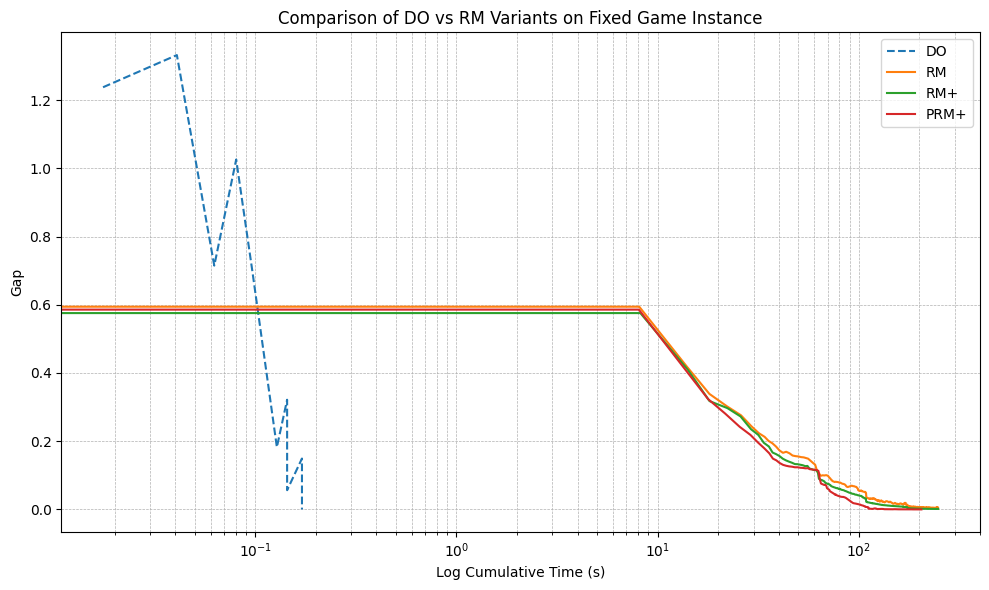

In [36]:
# visualize_algorithm_performance(do_df, rm_df, rmp_df, prmp_df, num_timesteps=9, num_attackers=1, num_defenders=1,
#     num_targets=10, dims=7, dt=1, fr=False, log_time=True)
visualize_algorithm_performance(do_df, rm_df, rmp_df, prmp_df, num_timesteps=7, num_attackers=3, num_defenders=1,
    num_targets=10, dims=7, dt=1, fr=False, log_time=True)

# Cover Figures

In [32]:
df = pd.read_csv("lobeke.csv")

In [33]:
df

,animal_id,lat,long,timestamp
0,14118,2.476,15.769,2002-03-30 00:00:00.000
1,14118,2.502,15.740,2002-03-31 00:00:00.000
2,14118,2.506,15.744,2002-03-31 00:00:00.000
3,14118,2.507,15.747,2002-03-31 00:00:00.000
4,14118,2.479,15.771,2002-04-01 00:00:00.000
...,...,...,...,...
3178,46179,2.288,16.008,2004-08-11 01:37:19.000
3179,46179,2.286,16.007,2004-08-11 04:01:10.000
3180,46179,2.274,16.039,2004-08-11 06:55:32.000
3181,46179,2.297,16.012,2004-08-12 01:27:37.000


In [34]:
lat_min, lon_min = 2.0530, 15.8790
lat_max, lon_max = 2.2837, 16.2038

coordinate_rectangle = [lat_min, lat_max, lon_min, lon_max]

# plot_animal_locations(df, coordinate_rectangle)

In [35]:
df_filtered = df[df["lat"]>=lat_min]
df_filtered = df_filtered[df_filtered["lat"]<=lat_max]
df_filtered = df_filtered[df_filtered["long"]>=lon_min]
df_filtered = df_filtered[df_filtered["long"]<=lon_max]

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import numpy as np
import os
def plot_elephant_movements(
    df,                      # DataFrame: must have ['animal_id', 'lat', 'long', 'timestamp']
    background_image_path,   # str: path to lobeke.png
    show_paths=True,         # bool: draw connecting paths
    fade_by_time=False,      # bool: fade points by recency
    use_elephant_icon=False, # bool: use elephant image instead of dots
    elephant_icon_path=None, # str: path to elephant image if use_elephant_icon is True
    output_path="elephant_movements.pdf",  # str: output PDF file
    figsize=(15, 12),        # figure size
    sample_frac=1.0,         # float: fraction of animal observations to keep
    random_state=None,       # int or None: for reproducibility
    elephant_zoom=0.08       # float: size of the elephant icon
):
    import numpy as np

    # Load background image
    img = mpimg.imread(background_image_path)

    # Downsample randomly if needed
    if sample_frac < 1.0:
        df = df.groupby("animal_id", group_keys=False).apply(
            lambda g: g.sample(frac=sample_frac, random_state=random_state)
        )

    # Sort by time
    df = df.sort_values(by=["animal_id", "timestamp"])

    # Set up plot
    fig, ax = plt.subplots(figsize=figsize)

    # Plot background image
    ax.imshow(img, extent=[
        df["long"].min() - 0.01, df["long"].max() + 0.01,
        df["lat"].min() - 0.01, df["lat"].max() + 0.01
    ], aspect='auto', alpha=1)

    # Normalize time if fading
    if fade_by_time:
        time_min = df["timestamp"].min()
        time_max = df["timestamp"].max()
        df["norm_time"] = (df["timestamp"] - time_min) / (time_max - time_min)

    # Load elephant icon if needed
    if use_elephant_icon and elephant_icon_path:
        elephant_img = mpimg.imread(elephant_icon_path)

    # Plot each animal
    for animal_id, group in df.groupby("animal_id"):
        if show_paths:
            ax.plot(group["long"], group["lat"], linewidth=1.0, alpha=0.7)

        if use_elephant_icon and elephant_icon_path:
            for _, row in group.iterrows():
                imgbox = OffsetImage(elephant_img, zoom=elephant_zoom)
                ab = AnnotationBbox(imgbox, (row["long"], row["lat"]), frameon=False)
                ax.add_artist(ab)
        else:
            if fade_by_time:
                ax.scatter(
                    group["long"], group["lat"],
                    c=group["norm_time"], cmap="viridis",
                    s=20, alpha=0.8, edgecolors='none'
                )
            else:
                ax.scatter(
                    group["long"], group["lat"],
                    color="black", s=10, alpha=0.8
                )

    # Style and cleanup
    ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    plt.tight_layout()

    # Save and close
    plt.savefig(output_path, format="pdf", dpi=300, bbox_inches='tight')
    plt.close()


def draw_green_security_graph(
    graph,
    positions_dict,
    home_bases,
    target_scores,
    home_icon_path,
    output_path=None,             
    home_icon_zoom=0.06,
    figsize=(12, 13.5),
    base_node_size=300,
    cmap='Reds'
):
    """
    Draws a green security game graph with color-coded targets and home base icons.

    Parameters:
        graph: networkx.Graph
        positions_dict: dict of node -> (row, col)
        home_bases: list of tuples of home base node IDs
        target_scores: dict of node -> float score
        home_icon_path: str, path to PNG/SVG image
        output_path: str or None, PDF output path if specified
        home_icon_zoom: float, zoom level for icon (default 0.06)
        figsize: tuple for matplotlib figure size
        base_node_size: int, base marker size for nodes
        cmap: str, Matplotlib colormap
    """
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    import networkx as nx
    import numpy as np

    max_row = max(row for row, col in positions_dict.values())
    positions = {node: (col, max_row - row) for node, (row, col) in positions_dict.items()}

    all_nodes = list(graph.nodes())
    score_values = np.array([target_scores.get(n, 0.0) for n in all_nodes])
    node_sizes = np.where(score_values > 0, base_node_size * 1.6, base_node_size)

    fig, ax = plt.subplots(figsize=figsize)

    # Draw nodes and edges
    nx.draw_networkx_nodes(
        graph,
        pos=positions,
        node_color=score_values,
        node_size=node_sizes,
        edgecolors="black",
        cmap=cmap,
        ax=ax
    )
    nx.draw_networkx_edges(graph, pos=positions, ax=ax)

    # Add home icons
    home_icon = mpimg.imread(home_icon_path)
    for base_group in home_bases:
        for h in base_group:
            if h in positions:
                x, y = positions[h]
                imagebox = OffsetImage(home_icon, zoom=home_icon_zoom)
                ab = AnnotationBbox(imagebox, (x, y), frameon=False, zorder=5)
                ax.add_artist(ab)

    # Clean display
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(False)
    plt.axis("off")
    
    # Remove padding around the figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Save or show
    if output_path:
        plt.savefig(output_path, format="pdf", dpi=300, bbox_inches="tight", pad_inches=0)
        plt.close()
    else:
        plt.show()

In [56]:
# plot_elephant_movements(
#     df_filtered,                      # DataFrame: must have ['animal_id', 'lat', 'long', 'timestamp']
#     "lobeke.jpg",    # str: path to lobeke.png
#     show_paths=True,          # bool: draw connecting paths
#     fade_by_time=False,       # bool: fade points by recency
#     use_elephant_icon=True,  # bool: use elephant image instead of dots
#     elephant_icon_path="elephant2.png",  # str: path to elephant image if use_elephant_icon is True
#     output_path="elephant_movements.pdf",  # str: output PDF file
#     figsize=(15, 12)          # figure size
# )

plot_elephant_movements(
    df=df_filtered,
    background_image_path="lobeke2.jpg",
    show_paths=True,          # bool: draw connecting paths
    fade_by_time=False,
    use_elephant_icon=True,
    elephant_icon_path="newelephant.png",
    sample_frac=0.045,
    random_state=42,
    elephant_zoom=0.15,
    output_path="elephant_movements.pdf",
    figsize=(12, 12)
)

C:\Users\Noah\AppData\Local\Temp\ipykernel_30748\787019057.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("animal_id", group_keys=False).apply(


In [37]:
df = pd.read_csv("lobeke.csv")
df.dropna(inplace=True)

lat_min, lon_min = 2.0530, 15.8790
lat_max, lon_max = 2.2837, 16.2038

coordinate_rectangle = [lat_min, lat_max, lon_min, lon_max]

schedule_form_kwargs = {
    "schedule_form": False,
    "simple": False,
    "attacker_penalty_factor": 5,
    "defender_penalty_factor": 5,
}

general_sum_kwargs = {
    "general_sum": False,
    "attacker_feature_value":  42, 
    "defender_feature_value": 69, 
    "defender_step_cost": 32.5, 
}

boulou_camp = (2.2,15.9)
# lobeke_camp = (2.25,15.75)
kabo_djembe = (2.0532352380408088, 16.085709866529694)
bomassa = (2.2037280296158355, 16.187056364164913)
inner_post = (2.2,15.98)

gsg = GreenSecurityGame(df, coordinate_rectangle, "centroid", num_clusters=10, num_rows=7, num_columns=7)
gsg.generate(num_attackers=1, 
             num_defenders=2, 
             home_base_assignments=[(kabo_djembe, bomassa, inner_post)], 
             num_timesteps=8, 
             generate_utility_matrix=False, 
             defense_time_threshold=1, 
             generate_actions=False, 
             force_return=False, 
             general_sum=False, 
             **schedule_form_kwargs)

In [76]:
draw_green_security_graph(
    graph=gsg.graph,
    positions_dict=nx.get_node_attributes(gsg.graph, "position"),
    home_bases=[(34,), (36,), (13,)],  # or however you structure them
    target_scores=nx.get_node_attributes(gsg.graph, "score"),
    home_icon_path="home.png",
    base_node_size=800,
    home_icon_zoom=.37,
    output_path="gsg_game.pdf"
)

In [61]:
from PIL import Image
import fitz  # PyMuPDF

def combine_pdfs_side_by_side(pdf1_path, pdf2_path, output_pdf_path):
    # Open first page of each PDF as image using fitz
    doc1 = fitz.open(pdf1_path)
    doc2 = fitz.open(pdf2_path)
    
    # Extract the first page as a pixmap (image) from each PDF
    page1 = doc1.load_page(0)
    page2 = doc2.load_page(0)
    pix1 = page1.get_pixmap(dpi=300)
    pix2 = page2.get_pixmap(dpi=300)
    
    # Convert to PIL Images
    img1 = Image.frombytes("RGB", [pix1.width, pix1.height], pix1.samples)
    img2 = Image.frombytes("RGB", [pix2.width, pix2.height], pix2.samples)

    # Use the exact width and height from the original images
    total_width = img1.width + img2.width
    max_height = max(img1.height, img2.height)
    combined_image = Image.new("RGB", (total_width, max_height), (255, 255, 255))
    
    # Paste the two images side by side without scaling
    combined_image.paste(img1, (0, 0))
    combined_image.paste(img2, (img1.width, 0))

    # Save as a single PDF without resizing
    combined_image.save(output_pdf_path, "PDF", resolution=300)

    # Clean up
    doc1.close()
    doc2.close()
# Example usage


In [77]:
combine_pdfs_side_by_side("elephant_movements.pdf", "gsg_game_cropped.pdf", "combined_output.pdf")

In [210]:
import pandas as pd
import geopandas as gpd
import numpy as np
from security_game.infra_security_game import InfraSecurityGame

gdf = gpd.read_file("chinatown_infra.geojson")

# Step 1: Handle relevant columns
infra_columns = [
    "id", "name", "power", "man_made", "amenity",
    "generator:method", "generator:source", "geometry"
]
available_columns = [col for col in infra_columns if col in gdf.columns]
gdf = gdf[available_columns].copy()

# Step 2: Extract generator type if present
gdf["generator_type"] = gdf.get("generator:method")
if "generator_type" not in gdf.columns or gdf["generator_type"].isnull().all():
    gdf["generator_type"] = gdf.get("generator:source")

# Step 3: Construct unified 'type' column
gdf["type"] = gdf.get("power")
if "amenity" in gdf.columns:
    gdf["type"] = gdf["type"].combine_first(gdf["amenity"])
if "man_made" in gdf.columns:
    gdf["type"] = gdf["type"].combine_first(gdf["man_made"])

# Step 4: Refine generator classification (solar vs. other)
gdf.loc[(gdf["type"] == "generator") & (gdf["generator_type"] == "photovoltaic"), "type"] = "solar_generator"
gdf.loc[(gdf["type"] == "generator") & (gdf["generator_type"] == "solar"), "type"] = "solar_generator"

# Step 5: Drop raw columns now that 'type' is finalized
df_simple = gdf[["id", "name", "type", "geometry"]].copy()

# Step 6: Separate nodes and ways
df_nodes = df_simple[df_simple["id"].str.contains("node")].copy()
df_nodes["x"] = df_nodes.geometry.x
df_nodes["y"] = df_nodes.geometry.y
df_nodes = df_nodes.drop(columns=["geometry"])

df_ways = df_simple[df_simple["id"].str.contains("way")].copy()
df_ways = df_ways.set_geometry("geometry").to_crs("EPSG:32618")
df_ways["centroid"] = df_ways.geometry.centroid
df_ways = df_ways.set_geometry("centroid").to_crs("EPSG:4326")
df_ways["x"] = df_ways.geometry.x
df_ways["y"] = df_ways.geometry.y
df_ways = df_ways.drop(columns=["geometry", "centroid"])

# Step 7: Combine nodes and ways
df_combined = pd.concat([df_nodes, df_ways], ignore_index=True)
df_combined = pd.concat([df_nodes, df_ways], ignore_index=True)
ny_blocks_gdf =  gpd.read_file("tl_2020_36_tabblock20.shp")
INFRA_WEIGHTS = {
    # Power Infrastructure
    "plant": 1.5,
    "generator": 1.35,
    "solar_generator": 0.95,
    "substation": 1.45,
    "transformer": 1.25,
    "tower": 1.1,
    "pole": 0.85,
    "line": 1.0,
    "minor_line": 0.9,
    "cable": 0.95,
    "switchgear": 1.2,
    "busbar": 0.8,
    "bay": 0.85,
    "converter": 1.05,
    "insulator": 0.75,
    "portal": 0.75,
    "connection": 0.7,
    "compensator": 1.0,
    "rectifier": 0.95,
    "inverter": 0.95,
    "storage": 0.9,

    # Healthcare
    "hospital": 1.5,
    "clinic": 1.35,

    # Education
    "school": 1.25,
    "university": 1.4,

    # Water & Sanitation
    "water_works": 1.45,
    "wastewater_plant": 1.4,

    # Government & Emergency Services
    "fire_station": 1.3,
    "police": 1.4,
    "courthouse": 1.2,

    # Critical Infrastructure
    "bunker_silo": 1.0,

    # Communications
    "communications_tower": 1.25,
}


bbox_hoboken_low = (40.745411, 40.735486, -74.025857,-74.041479)
bbox_hoboken_east = (40.748337, 40.734641,-74.022961,-74.031286)
bbox_downtown = (40.718721, 40.714078, -73.996074, -74.002651)
bbox_downtown_large = (40.7215, 40.710, -73.9935, -74.010)
# 40.7060, -74.0140, 40.7205, -73.9935
college_police = (40.743293077312465, -74.02670221027175)
police_station = (40.73768931976651, -74.02990519431108)
traffic_police = (40.7366602084371, -74.03449866349136)
downtown_station = (40.71232433042349, -74.00187755238431)
fifth_ave_station = (40.71637413934789, -73.9973285259067)
fifth_precinct = (40.71625547686622, -73.99736909131171)
booking_station = (40.716191530904815, -74.00102237385177)
police_plaza = (40.71236124409745, -74.00173715463521)
troop_nyc = (40.71657885026091, -74.00641139014367)
first_precinct = (40.720411300417446, -74.0070247584372)

brooklyn_bridge = (40.712438951145266, -74.004937098962)

schedule_form_kwargs = {
    "schedule_form": True,
    "simple": False,
    "attacker_penalty_factor": 5,
    "defender_penalty_factor": 5
}

general_sum_kwargs = {
    "general_sum": True,
    "attacker_feature_value":  1, 
    "defender_feature_value": 100, 
    "defender_step_cost": 0,
    "alpha":.5
}


isg = InfraSecurityGame(df_combined, ny_blocks_gdf, INFRA_WEIGHTS, bbox=bbox_downtown_large, escape_point=brooklyn_bridge)
isg.generate(num_attackers=1, num_defenders=1,
             home_base_assignments=[(fifth_precinct,booking_station, troop_nyc, first_precinct, police_plaza)],
             num_timesteps=7, 
             generate_utility_matrix=False, 
             generate_actions=False, 
             force_return=True, 
             defense_time_threshold=1, 
             **general_sum_kwargs, 
             **schedule_form_kwargs)

In [211]:
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def draw_infra_security_graph(
    graph,
    targets,
    home_bases,
    home_icon_path,
    node_size=50,
    target_size=200,
    home_icon_zoom=0.15,
    edge_min_width=0.5,
    edge_max_width=2.5,
    scale_edges_by_length=True,
    figsize=(12, 12),
    output_path=None  # Optional PDF output
):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_facecolor("white")

    # Extract edge lengths if scaling is enabled
    if scale_edges_by_length:
        lengths = [data.get("length", 1) for _, _, data in graph.edges(data=True)]
        min_length = min(lengths)
        max_length = max(lengths)
        edge_widths = [
            edge_min_width + (edge_max_width - edge_min_width) * ((length - min_length) / (max_length - min_length))
            for length in lengths
        ]
    else:
        edge_widths = [edge_max_width] * len(graph.edges)

    # Plot the base graph with controlled edge thickness
    ox.plot_graph(
        graph,
        ax=ax,
        node_size=node_size,
        node_color="gray",
        edge_color="lightgray",
        edge_linewidth=edge_widths,
        show=False,
        close=False
    )

    # Plot target nodes in red
    target_nodes = [target.node for target in targets if target.node in graph.nodes]
    target_positions = {node: (graph.nodes[node]["x"], graph.nodes[node]["y"]) for node in target_nodes}
    target_xs = [pos[0] for pos in target_positions.values()]
    target_ys = [pos[1] for pos in target_positions.values()]
    ax.scatter(target_xs, target_ys, s=target_size, c="red", alpha=0.8, zorder=5)

    # Add home base icons
    home_icon = mpimg.imread(home_icon_path)
    for base_group in home_bases:
        for h in base_group:
            if h in graph.nodes:
                x, y = graph.nodes[h]["x"], graph.nodes[h]["y"]
                imagebox = OffsetImage(home_icon, zoom=home_icon_zoom)
                ab = AnnotationBbox(imagebox, (x, y), frameon=False, zorder=6)
                ax.add_artist(ab)

    # Clean up figure
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis("off")
    plt.tight_layout(pad=0)

    # Save to PDF if output_path is provided
    if output_path:
        plt.savefig(output_path, format="pdf", dpi=300, bbox_inches="tight")
        plt.close()
    else:
        plt.show()


In [212]:

# positions = {node: (data["x"], data["y"]) for node, data in isg.graph.nodes(data=True)}
# draw_infra_security_graph(
#     graph=isg.graph,
#     targets=isg.targets,
#     home_bases=[(207,), (36,), (10,), (115,), (231,)],
#     home_icon_path="home.png",
#     node_size=100,
#     target_size=200,
#     home_icon_zoom=0.1
# )

draw_infra_security_graph(
    graph=isg.graph,
    targets=isg.targets,
    home_bases=[(207,), (36,), (10,), (115,), (231,)],
    home_icon_path="home.png",
    node_size=125,
    target_size=300,
    home_icon_zoom=0.25,
    edge_min_width=2,
    edge_max_width=4,
    scale_edges_by_length=True,
    output_path="infra_security_graph.pdf"  # Save as PDF
)

In [115]:
combine_pdfs_side_by_side("chinatown.pdf", "infra_security_graph.pdf", "combined_output_sg.pdf")

# Iterative Exp Plots

In [1]:
# 8 curves per figure
# NFG
# DO Normal
# RM, RM+, PRM+
# DO Random target vals
# RM, RM+, PRM+ Random target vals

#same for SF

In [201]:
# def plot_iterative_algorithm_convergence(
#     nfgdo, nfgrm, nfgrmp, nfgprmp,
#     rnfgdo, rnfgrm, rnfgrmp, rnfgprmp,
#     num_xticks=6, fake_zero=1e-2, title=None
# ):
#     import matplotlib.pyplot as plt
#     import numpy as np

#     plt.figure(figsize=(12, 7))

#     def simple_cumtime_and_normalized_gaps(df, rand_do=False):
#         times = list(df['iteration_times'])
#         gaps = list(df['gaps'])
#         max_gap = max(gaps) if max(gaps) != 0 else 1e-8
        
#         normalized_gaps = [g / max_gap for g in gaps]
#         if rand_do:
#             print(f"max gap: {max_gap}")
#             print(f"gaps: {gaps}")
#             print(f"normalized_gaps: {normalized_gaps}")
#         cum = 0
#         cumtimes = []
#         for t in times:
#             cumtimes.append(cum)
#             cum += t
#         if cumtimes[0] == 0:
#             cumtimes[0] = fake_zero # fake small nonzero to show on log scale
#         return cumtimes, normalized_gaps

#     def plot_single(df, label, color, linestyle='-'):
#         times, gaps = simple_cumtime_and_normalized_gaps(df)
#         plt.plot(times, gaps, label=label, color=color, linestyle=linestyle)

#     def plot_seeded(df, label, color, linestyle='--'):
#         grouped = df.groupby("seed")
#         all_times = []
#         all_gaps = []
    
#         for _, g in grouped:
#             times = list(g.sort_values("iteration_number")['iteration_times'])
#             gaps = list(g.sort_values("iteration_number")['gaps'])
#             cum = 0
#             cumtimes = []
#             for t in times:
#                 cumtimes.append(cum)
#                 cum += t
#             if cumtimes[0] == 0:
#                 cumtimes[0] = fake_zero
#             all_times.append(cumtimes)
#             all_gaps.append(gaps)
    
#         # Pad sequences with NaNs
#         max_len = max(len(g) for g in all_gaps)
#         padded_times = [t + [np.nan] * (max_len - len(t)) for t in all_times]
#         padded_gaps = [g + [np.nan] * (max_len - len(g)) for g in all_gaps]
    
#         time_array = np.array(padded_times)
#         gap_array = np.array(padded_gaps)
    
#         # Average across seeds
#         mean_times = np.nanmean(time_array, axis=0)
#         mean_gaps = np.nanmean(gap_array, axis=0)
    
#         # Normalize mean gap by its own max (after averaging)
#         max_gap = np.nanmax(mean_gaps)
#         norm_mean_gaps = mean_gaps / max_gap if max_gap != 0 else mean_gaps
    
#         stderr = np.nanstd(gap_array, axis=0) / np.sqrt(np.sum(~np.isnan(gap_array), axis=0))
#         norm_stderr = stderr / max_gap if max_gap != 0 else stderr

#         mean_times = sorted(mean_times)
#         plt.plot(mean_times, norm_mean_gaps, color=color, linestyle=linestyle, label=label)
#         plt.fill_between(mean_times, norm_mean_gaps - norm_stderr, norm_mean_gaps + norm_stderr, color=color, alpha=0.2)

#     # Plot deterministic runs
#     plot_single(nfgdo, 'DO', 'blue')
#     plot_single(nfgrm, 'RM', 'orange')
#     plot_single(nfgrmp, 'RMP', 'green')
#     plot_single(nfgprmp, 'PRMP', 'red')

#     # Plot random means with stderr bands
#     plot_seeded(rnfgdo, 'Rand DO', 'blue', '--')
#     plot_seeded(rnfgrm, 'Rand RM', 'orange', '--')
#     plot_seeded(rnfgrmp, 'Rand RMP', 'green', '--')
#     plot_seeded(rnfgprmp, 'Rand PRMP', 'red', '--')

#     # Compute range of all x-values for tick spacing
#     all_times = []
#     for df in [nfgdo, nfgrm, nfgrmp, nfgprmp]:
#         t, _ = simple_cumtime_and_normalized_gaps(df)
#         all_times.extend(t)
#     min_x = max(min(all_times), 1e-3)
#     max_x = max(all_times)

#     tick_positions = np.logspace(np.log10(min_x), np.log10(max_x), num=num_xticks)
#     tick_labels = [f"{x:.1f}s" for x in tick_positions]

#     plt.xscale("log")
#     plt.xticks(tick_positions, tick_labels, rotation=45)
#     plt.xlabel("Cumulative Time (log scale)")
#     plt.ylabel("Normalized Utility Gap")
#     if title:
#         plt.title(title)
#     else:
#         plt.title("Convergence of Iterative Algorithms (Normalized Gap vs Time)")
#     plt.grid(True, which='both', linestyle='--', alpha=0.6)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()
def plot_iterative_algorithm_convergence(
    nfgdo, nfgrm, nfgrmp, nfgprmp,
    rnfgdo, rnfgrm, rnfgrmp, rnfgprmp,
    num_xticks=6, fake_zero=1e-2, title=None,
    save_path=None
):
    # === Set global font sizes ===
    plt.rcParams.update({
        'font.size': 20,          # Base font size
        'axes.titlesize': 27,     # Title size
        'axes.labelsize': 25,     # Axis label size
        'xtick.labelsize': 22,    # X tick size
        'ytick.labelsize': 22,    # Y tick size
        'legend.fontsize': 19     # Legend font size
    })

    plt.figure(figsize=(12, 7))

    def simple_cumtime_and_normalized_gaps(df):
        times = list(df['iteration_times'])
        gaps = list(df['gaps'])
        max_gap = max(gaps) if max(gaps) != 0 else 1e-8
        normalized_gaps = [g / max_gap for g in gaps]
        cum = 0
        cumtimes = []
        for t in times:
            cumtimes.append(cum)
            cum += t
        if cumtimes[0] == 0:
            cumtimes[0] = fake_zero
        return cumtimes, normalized_gaps

    def plot_single(df, label, color, linestyle='-'):
        times, gaps = simple_cumtime_and_normalized_gaps(df)
        plt.plot(times, gaps, label=label, color=color, linestyle=linestyle)

    def plot_seeded(df, label, color, linestyle='--'):
        grouped = df.groupby("seed")
        all_times = []
        all_gaps = []
        for _, g in grouped:
            times = list(g.sort_values("iteration_number")['iteration_times'])
            gaps = list(g.sort_values("iteration_number")['gaps'])
            cum = 0
            cumtimes = []
            for t in times:
                cumtimes.append(cum)
                cum += t
            if cumtimes[0] == 0:
                cumtimes[0] = fake_zero
            all_times.append(cumtimes)
            all_gaps.append(gaps)

        max_len = max(len(g) for g in all_gaps)
        padded_times = [t + [np.nan] * (max_len - len(t)) for t in all_times]
        padded_gaps = [g + [np.nan] * (max_len - len(g)) for g in all_gaps]

        time_array = np.array(padded_times)
        gap_array = np.array(padded_gaps)

        mean_times = np.nanmean(time_array, axis=0)
        mean_gaps = np.nanmean(gap_array, axis=0)

        max_gap = np.nanmax(mean_gaps)
        norm_mean_gaps = mean_gaps / max_gap if max_gap != 0 else mean_gaps
        stderr = np.nanstd(gap_array, axis=0) / np.sqrt(np.sum(~np.isnan(gap_array), axis=0))
        norm_stderr = stderr / max_gap if max_gap != 0 else stderr

        mean_times = sorted(mean_times)
        plt.plot(mean_times, norm_mean_gaps, color=color, linestyle=linestyle, label=label)
        plt.fill_between(mean_times, norm_mean_gaps - norm_stderr, norm_mean_gaps + norm_stderr, color=color, alpha=0.2)

    # === Plot each algorithm ===
    plot_single(nfgdo, 'DO', 'blue')
    plot_single(nfgrm, 'RM', 'orange')
    plot_single(nfgrmp, 'RM+', 'green')
    plot_single(nfgprmp, 'PRM+', 'red')

    plot_seeded(rnfgdo, 'Rand DO', 'blue', '--')
    plot_seeded(rnfgrm, 'Rand RM', 'orange', '--')
    plot_seeded(rnfgrmp, 'Rand RM+', 'green', '--')
    plot_seeded(rnfgprmp, 'Rand PRM+', 'red', '--')

    # === Log-scale X-axis tick formatting ===
    all_times = []
    for df in [nfgdo, nfgrm, nfgrmp, nfgprmp]:
        t, _ = simple_cumtime_and_normalized_gaps(df)
        all_times.extend(t)
    min_x = max(min(all_times), 1e-3)
    max_x = max(all_times)
    tick_positions = np.logspace(np.log10(min_x), np.log10(max_x), num=num_xticks)
    tick_labels = [f"{x:.1f}s" for x in tick_positions]

    plt.xscale("log")
    plt.xticks(tick_positions, tick_labels, rotation=45)
    plt.xlabel("Cumulative Time (log scale)")
    plt.ylabel("Normalized Duality Gap")
    plt.title(title or "Convergence of Iterative Algorithms (Normalized Gap vs Time)")
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    plt.legend(loc='upper right')
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='pdf')
    else:
        plt.show()
##################################################################################################

def plot_four_panel_convergence(
    sets1, sets2, sets3, sets4, 
    titles=None, save_path=None, legend_ncol=8, num_xticks=6, fake_zero=1e-2
):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.rcParams.update({
        'font.size': 20,
        'axes.titlesize': 33,
        'axes.labelsize': 33,
        'xtick.labelsize': 25,
        'ytick.labelsize': 25,
        'legend.fontsize': 31
    })

    fig, axs = plt.subplots(1, 4, figsize=(28, 7), sharey=True, gridspec_kw={'wspace': 0.05})

    colors = ["blue", "orange", "green", "red", "blue", "orange", "green", "red"]
    linestyles = ["-", "-", "-", "-", "--", "--", "--", "--"]
    labels = ["DO", "RM", "RM+", "PRM+", "Rand DO", "Rand RM", "Rand RM+", "Rand PRM+"]

    all_handles = []
    all_labels = []

    def process(df, color, linestyle, label, ax):
        if "seed" in df.columns:
            grouped = df.groupby("seed")
            all_times, all_gaps = [], []

            for _, g in grouped:
                times = list(g.sort_values("iteration_number")['iteration_times'])
                gaps = list(g.sort_values("iteration_number")['gaps'])
                cum = 0
                cumtimes = []
                for t in times:
                    cumtimes.append(cum)
                    cum += t
                if cumtimes[0] == 0:
                    cumtimes[0] = fake_zero
                all_times.append(cumtimes)
                all_gaps.append(gaps)

            max_len = max(len(g) for g in all_gaps)
            time_array = np.array([t + [np.nan]*(max_len - len(t)) for t in all_times])
            gap_array = np.array([g + [np.nan]*(max_len - len(g)) for g in all_gaps])

            mean_times = np.nanmean(time_array, axis=0)
            mean_gaps = np.nanmean(gap_array, axis=0)

            max_gap = np.nanmax(mean_gaps)
            norm_mean_gaps = mean_gaps / max_gap if max_gap != 0 else mean_gaps
            stderr = np.nanstd(gap_array, axis=0) / np.sqrt(np.sum(~np.isnan(gap_array), axis=0))
            norm_stderr = stderr / max_gap if max_gap != 0 else stderr

            sorted_idx = np.argsort(mean_times)
            mean_times = mean_times[sorted_idx]
            norm_mean_gaps = norm_mean_gaps[sorted_idx]
            norm_stderr = norm_stderr[sorted_idx]

            line = ax.plot(mean_times, norm_mean_gaps, color=color, linestyle=linestyle, linewidth=2.5, label=label)[0]
            ax.fill_between(mean_times, norm_mean_gaps - norm_stderr, norm_mean_gaps + norm_stderr, color=color, alpha=0.2)
        else:
            times = list(df['iteration_times'])
            gaps = list(df['gaps'])
            cum = 0
            cumtimes = []
            for t in times:
                cumtimes.append(cum)
                cum += t
            if cumtimes[0] == 0:
                cumtimes[0] = fake_zero
            max_gap = max(gaps)
            norm_gaps = [g / max_gap if max_gap != 0 else g for g in gaps]
            line = ax.plot(cumtimes, norm_gaps, color=color, linestyle=linestyle, linewidth=2.5, label=label)[0]

        if label not in all_labels:
            all_handles.append(line)
            all_labels.append(label)

    for ax, dataset, title in zip(axs, [sets1, sets2, sets3, sets4], titles or ["Set 1", "Set 2", "Set 3", "Set 4"]):
        for df, label, color, linestyle in zip(dataset, labels, colors, linestyles):
            process(df, color, linestyle, label, ax)
        ax.set_title(title)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.set_xscale("log")
        ax.set_xlim(left=1e-2, right=100)  # <-- CUT OFF AT 100s

    for ax in axs:
        ax.set_xlim(left=1e-2, right=100)
        ax.set_xticks([1e-2, 1e-1, 1, 10, 100])
        ax.set_xticklabels(["$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$", "$10^{2}$"], rotation=60)

    # for ax, dataset, title in zip(axs, [sets1, sets2, sets3, sets4], titles or ["Set 1", "Set 2", "Set 3", "Set 4"]):
    #     for df, label, color, linestyle in zip(dataset, labels, colors, linestyles):
    #         process(df, color, linestyle, label, ax)
    #     ax.set_title(title)
    #     ax.grid(True, linestyle='--', alpha=0.6)
    #     ax.set_xscale("log")

    # for ax in axs:
    #     ax.set_xticks([1e-2, 1e-1, 1, 10, 100, 1000])
    #     ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

    axs[0].set_ylabel("Normalized Duality Gap")
    fig.text(0.5, 0, "Cumulative Time (seconds, log scale)", ha='center', fontsize=31)

    fig.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, -0.17), ncol=legend_ncol, frameon=True, columnspacing=1)

    fig.tight_layout(pad=0)
    fig.subplots_adjust(bottom=0.2, left=0.07, right=0.99, top=0.88)

    if save_path:
        fig.savefig(save_path, format='pdf', bbox_inches="tight")
    else:
        plt.show()


## GSG NFG

### Data

In [108]:
gnfgdo = pd.read_csv("GSG_NFG_DO_MASS_FINAL.csv").rename(columns={"iteration_time":"iteration_times", "gap":"gaps"})
gnfgdo = gnfgdo[(gnfgdo["num_attackers"]==1) & 
(gnfgdo["num_attackers"]==1) & 
(gnfgdo["num_defenders"]==1) & 
(gnfgdo["num_timesteps"]==8) & 
(gnfgdo["num_clusters"]==10) & 
(gnfgdo["dims"]==7) & 
(gnfgdo["force_return"]==False) &
(gnfgdo["defense_time_threshold"]==1)]
gnfgdo = gnfgdo.iloc[1:]
gnfgdo

,Unnamed: 0,num_timesteps,num_attackers,num_defenders,num_clusters,dims,force_return,defense_time_threshold,iteration_number,iteration_times,gaps,iterations_to_converge,def_support,defender_actions_size,attacker_actions_size
8701,8701,8,1,1,10,7,False,1,2,0.023644,0.842657,13,6,10,6
8702,8702,8,1,1,10,7,False,1,3,0.000000,0.821678,13,6,10,6
8703,8703,8,1,1,10,7,False,1,4,0.033451,0.821678,13,6,10,6
8704,8704,8,1,1,10,7,False,1,5,0.019514,0.727273,13,6,10,6
8705,8705,8,1,1,10,7,False,1,6,0.023491,0.727273,13,6,10,6
8706,8706,8,1,1,10,7,False,1,7,0.015711,0.264638,13,6,10,6
8707,8707,8,1,1,10,7,False,1,8,0.016153,0.510490,13,6,10,6
8708,8708,8,1,1,10,7,False,1,9,0.031914,0.510490,13,6,10,6
8709,8709,8,1,1,10,7,False,1,10,0.031737,0.114988,13,6,10,6
8710,8710,8,1,1,10,7,False,1,11,0.015763,0.229219,13,6,10,6


In [109]:
gnfgrm = pd.read_csv("GSG_NFG_RM_FINAL_WITH_FR_DT.csv")
gnfgrm = gnfgrm[(gnfgrm["num_timesteps"]==8) &
(gnfgrm["num_defenders"]==1) &
(gnfgrm["defense_time_threshold"]==1) &
(gnfgrm["force_return"]==False) &
(gnfgrm["num_attackers"]==1)]

gnfgrmp = pd.read_csv("GSG_NFG_NEW_RMP_FINAL_WITH_FR_DT.csv")

gnfgprmp = pd.read_csv("GSG_NFG_PRMP_FINAL_WITH_FR_DT.csv")
gnfgprmp = gnfgprmp[(gnfgprmp["num_timesteps"]==8) &
(gnfgprmp["num_defenders"]==1) &
(gnfgprmp["defense_time_threshold"]==1) &
(gnfgprmp["force_return"]==False) &
(gnfgprmp["num_attackers"]==1)]

nfgprmp


,Unnamed: 0,num_timesteps,num_attackers,num_defenders,defense_time_threshold,interval_number,iteration_times,gaps,iteration_number
684,684,8,1,1,1,1,0.683501,0.577843,5
685,685,8,1,1,1,2,0.708482,0.485830,10
686,686,8,1,1,1,3,0.962303,0.227148,15
687,687,8,1,1,1,4,0.867697,0.238126,20
688,688,8,1,1,1,5,0.869761,0.237032,25
...,...,...,...,...,...,...,...,...,...
804,804,8,1,1,1,121,0.726327,0.000275,605
805,805,8,1,1,1,122,0.712436,0.000268,610
806,806,8,1,1,1,123,0.687232,0.000262,615
807,807,8,1,1,1,124,0.713935,0.000255,620


In [110]:
grnfgdo = pd.read_csv("GSG_NFG_DO_RANDOM_TARGET_VALUES_FR_FALSE.csv")

grnfgdo = grnfgdo[(grnfgdo["num_defenders"]==1)].rename(columns={"iteration_time":"iteration_times", "gap":"gaps"})

# rnfgdo = rnfgdo[rnfgdo["iteration_number"]!=1]
# rnfgdo

In [111]:
grnfgrm = pd.read_csv("GSG_NFG_RM_RANDOM_MATRIX_FR_FALSE.csv")
grnfgrmp = pd.read_csv("GSG_NFG_RMP_NEW_RANDOM_MATRIX_FR_FALSE.csv")
grnfgprmp = pd.read_csv("GSG_NFG_PRMP_RANDOM_MATRIX.csv")

### PLOT

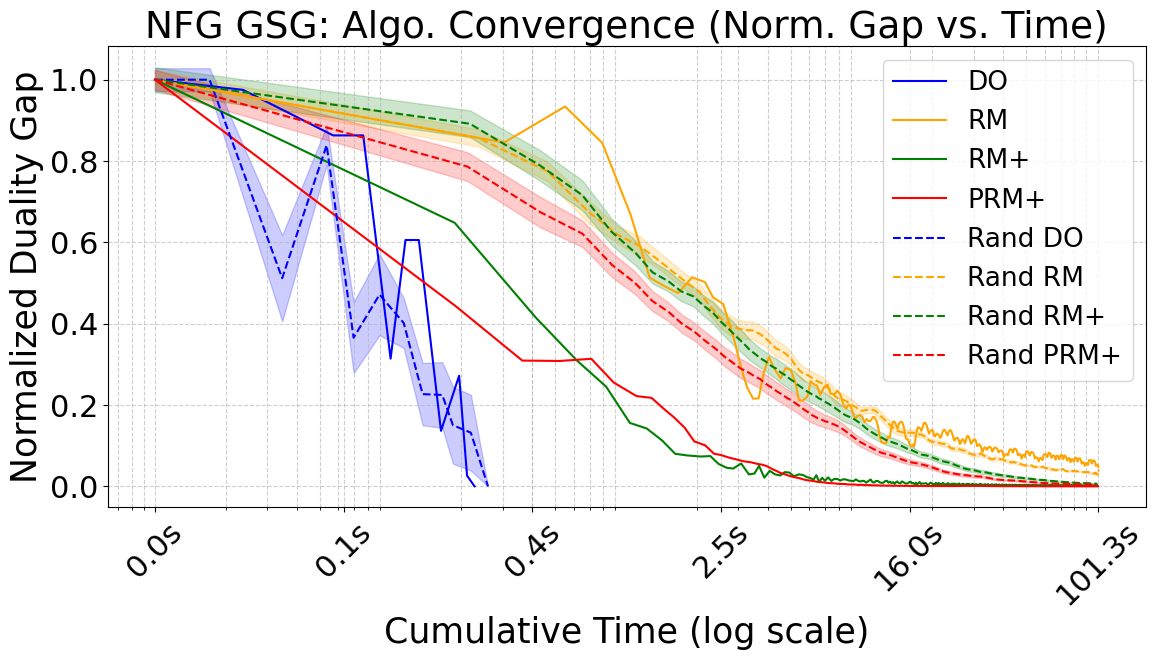

In [112]:
plot_iterative_algorithm_convergence(gnfgdo, gnfgrm, gnfgrmp, gnfgprmp, grnfgdo, grnfgrm, grnfgrmp, grnfgprmp, num_xticks=6, 
                                     title="NFG GSG: Algo. Convergence (Norm. Gap vs. Time)",
                                     save_path="nfg_gsg_iterative.pdf")

## GSG SF

### DATA

In [113]:
gsfdo = pd.read_csv("GSG_SF_DO_MASS_FINAL.csv").rename(columns={"iteration_time":"iteration_times", "gap":"gaps"})
gsfdo = gsfdo[
(gsfdo["num_defenders"]==2) & 
(gsfdo["num_timesteps"]==8) & 
(gsfdo["num_clusters"]==10) & 
(gsfdo["dims"]==7) & 
(gsfdo["defense_time_threshold"]==1)]
# sfdo = sfdo.iloc[1:]
gsfdo

,Unnamed: 0,num_timesteps,num_defenders,num_clusters,dims,defense_time_threshold,iteration_number,iteration_times,gaps,iterations_to_converge,def_support,defender_actions_size,attacker_actions_size
1858,1858,8,2,10,7,1,1,0.002009,6.426573e-01,23,7,21,8
1859,1859,8,2,10,7,1,2,0.002104,6.741259e-01,23,7,21,8
1860,1860,8,2,10,7,1,3,0.007325,6.216783e-01,23,7,21,8
1861,1861,8,2,10,7,1,4,0.005228,6.573427e-01,23,7,21,8
1862,1862,8,2,10,7,1,5,0.003004,3.440824e-01,23,7,21,8
1863,1863,8,2,10,7,1,6,0.011391,6.251748e-01,23,7,21,8
1864,1864,8,2,10,7,1,7,0.006065,3.515768e-01,23,7,21,8
1865,1865,8,2,10,7,1,8,0.007284,3.483638e-01,23,7,21,8
1866,1866,8,2,10,7,1,9,0.008250,3.804196e-01,23,7,21,8
1867,1867,8,2,10,7,1,10,0.005150,3.005776e-01,23,7,21,8


In [114]:
gsfrm = pd.read_csv("GSG_SF_RM_FINAL_FIXED.csv")
gsfrm = gsfrm[(gsfrm["num_timesteps"]==8) &
(gsfrm["num_defenders"]==2) &
(gsfrm["defense_time_threshold"]==1) &
(gsfrm["num_attackers"]==1)]

gsfrmp = pd.read_csv("GSG_SF_NEW_RMP_FINAL_FIXED.csv")
gsfrmp = gsfrmp[(gsfrmp["num_timesteps"]==8) &
(gsfrmp["num_defenders"]==2) &
(gsfrmp["defense_time_threshold"]==1) &
(gsfrmp["num_attackers"]==1)]

gsfprmp = pd.read_csv("GSG_SF_PRMP_FINAL_FIXED.csv")
gsfprmp = gsfprmp[(gsfprmp["num_timesteps"]==8) &
(gsfprmp["num_defenders"]==2) &
(gsfprmp["defense_time_threshold"]==1) &
(gsfprmp["num_attackers"]==1)]

gsfrm


,Unnamed: 0,num_timesteps,num_attackers,num_defenders,defense_time_threshold,interval_number,iteration_times,gaps,iteration_number
14124,14124,8,1,2,1,1,0.063435,0.311078,5
14125,14125,8,1,2,1,2,0.047730,0.226550,10
14126,14126,8,1,2,1,3,0.048064,0.199280,15
14127,14127,8,1,2,1,4,0.047487,0.177239,20
14128,14128,8,1,2,1,5,0.048064,0.147977,25
...,...,...,...,...,...,...,...,...,...
15728,15728,8,1,2,1,1605,0.048119,0.005503,8025
15729,15729,8,1,2,1,1606,0.094908,0.005472,8030
15730,15730,8,1,2,1,1607,0.111066,0.005435,8035
15731,15731,8,1,2,1,1608,0.047879,0.005397,8040


In [115]:
grsfdo = pd.read_csv("GSG_SF_DO_RANDOM_TARGET_VALUES.csv")

grsfdo = grsfdo[(grsfdo["num_defenders"]==2)].rename(columns={"iteration_time":"iteration_times", "gap":"gaps"})
grsfdo

,Unnamed: 0,seed,num_timesteps,num_defenders,num_clusters,dims,defense_time_threshold,iteration_number,iteration_times,gaps,iterations_to_converge,def_support,defender_actions_size,attacker_actions_size
0,0,1,8,2,10,7,1,1,0.011556,0.445618,6,1,4,3
1,1,1,8,2,10,7,1,2,0.002012,0.556458,6,1,4,3
2,2,1,8,2,10,7,1,3,0.002149,0.293122,6,1,4,3
3,3,1,8,2,10,7,1,4,0.003221,0.033927,6,1,4,3
4,4,1,8,2,10,7,1,5,0.002006,0.031977,6,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,104,10,8,2,10,7,1,6,0.005134,0.452924,10,5,5,7
105,105,10,8,2,10,7,1,7,0.003043,0.028749,10,5,5,7
106,106,10,8,2,10,7,1,8,0.004182,0.028235,10,5,5,7
107,107,10,8,2,10,7,1,9,0.003045,0.615872,10,5,5,7


In [117]:
grsfrm = pd.read_csv("GSG_SF_RM_RANDOM_MATRIX.csv")
grsfrmp = pd.read_csv("GSG_SF_RMP_NEW_RANDOM_MATRIX.csv")
grsfprmp = pd.read_csv("GSG_SF_PRMP_RANDOM_MATRIX.csv")

### PLOT

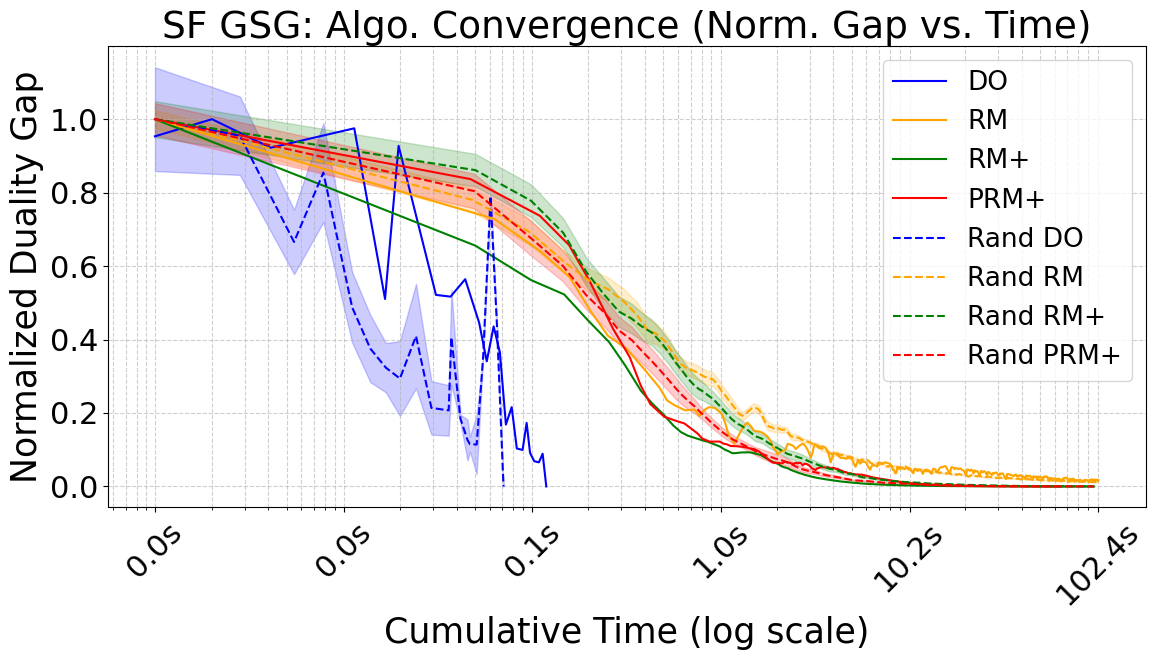

In [118]:
plot_iterative_algorithm_convergence(gsfdo, gsfrm, gsfrmp, gsfprmp, grsfdo, grsfrm, grsfrmp, grsfprmp, num_xticks=6, fake_zero = 1e-3,
                                     title="SF GSG: Algo. Convergence (Norm. Gap vs. Time)",
                                     save_path="sf_gsg_iterative.pdf")

## ISG NFG

In [120]:
infgdo = pd.read_csv("ISG_NFG_DO_MASS_FINAL.csv").rename(columns={"iteration_time":"iteration_times", "gap":"gaps"})
infgdo = infgdo[(infgdo["num_attackers"]==1) & 
(infgdo["num_attackers"]==1) & 
(infgdo["num_defenders"]==1) & 
(infgdo["num_timesteps"]==8) & 
(infgdo["force_return"]==False) &
(infgdo["defense_time_threshold"]==1)]
infgdo = infgdo.iloc[1:]
infgdo

,Unnamed: 0,num_timesteps,num_attackers,num_defenders,force_return,defense_time_threshold,iteration_number,iteration_times,gaps,iterations_to_converge,def_support,defender_actions_size,attacker_actions_size
465,465,8,1,1,False,1,2,0.049441,8.509795e-01,5,3,5,3
466,466,8,1,1,False,1,3,0.072098,2.191448e-01,5,3,5,3
467,467,8,1,1,False,1,4,0.066252,6.788903e-01,5,3,5,3
468,468,8,1,1,False,1,5,0.099352,1.110223e-16,5,3,5,3


In [121]:
infgrm = pd.read_csv("ISG_NFG_RM_FINAL.csv")
infgrm = infgrm[(infgrm["num_timesteps"]==8) &
(infgrm["num_defenders"]==1) &
(infgrm["defense_time_threshold"]==1) &
(infgrm["num_attackers"]==1)]

infgrmp = pd.read_csv("ISG_NFG_NWE_RMP_FINAL.csv")

infgprmp = pd.read_csv("ISG_NFG_PRMP_FINAL.csv")
infgprmp = infgprmp[(infgprmp["num_timesteps"]==8) &
(infgprmp["num_defenders"]==1) &
(infgprmp["defense_time_threshold"]==1) &
(infgprmp["num_attackers"]==1)]

In [122]:
irnfgdo = pd.read_csv("ISG_NFG_DO_RANDOM_TARGET_VALUES.csv")

irnfgdo = irnfgdo[(irnfgdo["num_defenders"]==1)].rename(columns={"iteration_time":"iteration_times", "gap":"gaps"})
irnfgdo = irnfgdo[irnfgdo["iteration_number"]!=1]

irnfgdo

,Unnamed: 0,seed,num_timesteps,num_attackers,num_defenders,force_return,defense_time_threshold,iteration_number,iteration_times,gaps,iterations_to_converge,def_support,defender_actions_size,attacker_actions_size
1,1,1,8,1,1,True,1,2,0.065360,9.741637e-01,11,6,11,6
2,2,1,8,1,1,True,1,3,0.071107,4.523893e-01,11,6,11,6
3,3,1,8,1,1,True,1,4,0.053080,9.458457e-01,11,6,11,6
4,4,1,8,1,1,True,1,5,0.077032,2.678402e-01,11,6,11,6
5,5,1,8,1,1,True,1,6,0.052644,9.163956e-01,11,6,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,122,10,8,1,1,True,1,12,0.064498,8.537831e-01,16,8,15,8
123,123,10,8,1,1,True,1,13,0.061395,6.017736e-02,16,8,15,8
124,124,10,8,1,1,True,1,14,0.066676,8.497936e-01,16,8,15,8
125,125,10,8,1,1,True,1,15,0.082418,1.139551e-01,16,8,15,8


In [124]:
irnfgrm = pd.read_csv("ISG_NFG_RM_RANDOM_MATRIX.csv")
irnfgrmp = pd.read_csv("ISG_NFG_RMP_NEW_RANDOM_MATRIX.csv")
irnfgprmp = pd.read_csv("ISG_NFG_PRMP_RANDOM_MATRIX.csv")

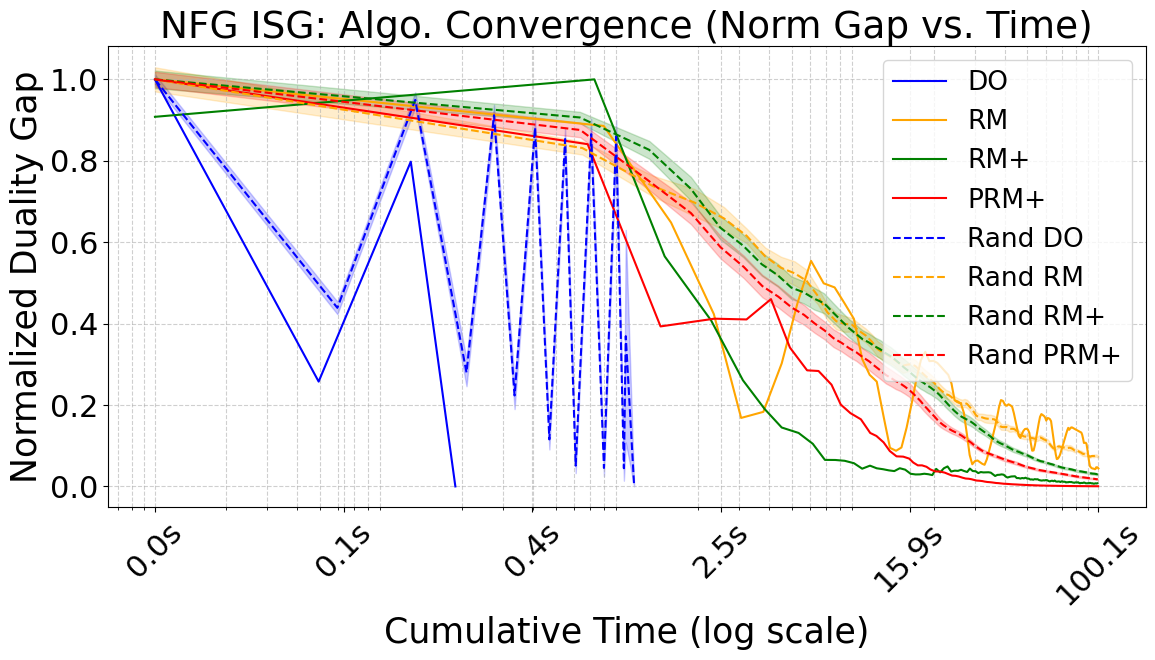

In [125]:
plot_iterative_algorithm_convergence(infgdo, infgrm, infgrmp, infgprmp, irnfgdo, irnfgrm, irnfgrmp, irnfgprmp, num_xticks=6, 
                                     title="NFG ISG: Algo. Convergence (Norm Gap vs. Time)",
                                     save_path="nfg_isg_iterative.pdf")

## ISG SF

In [126]:
isfdo = pd.read_csv("ISG_SF_DO_MASS_FINAL.csv").rename(columns={"iteration_time":"iteration_times", "gap":"gaps"})
isfdo = isfdo[
(isfdo["num_defenders"]==3) & 
(isfdo["num_timesteps"]==8) & 
(isfdo["defense_time_threshold"]==1)]
# sfdo = sfdo.iloc[1:]

In [127]:
isfrm = pd.read_csv("ISG_SF_RM_FINAL.csv")
isfrm = isfrm[(isfrm["num_timesteps"]==8) &
(isfrm["num_defenders"]==2) &
(isfrm["defense_time_threshold"]==1) &
(isfrm["num_attackers"]==1)]

isfrmp = pd.read_csv("ISG_SF_NEW_RMP_FINAL.csv")
isfrmp = isfrmp[(isfrmp["num_timesteps"]==8) &
(isfrmp["num_defenders"]==2) &
(isfrmp["defense_time_threshold"]==1) &
(isfrmp["num_attackers"]==1)]

isfprmp = pd.read_csv("ISG_SF_PRMP_FINAL.csv")
isfprmp = isfprmp[(isfprmp["num_timesteps"]==8) &
(isfprmp["num_defenders"]==2) &
(isfprmp["defense_time_threshold"]==1) &
(isfprmp["num_attackers"]==1)]

In [128]:
irsfdo = pd.read_csv("ISG_SF_DO_2DEF_RANDOM_TARGET_VALUES.csv")

irsfdo = irsfdo[(irsfdo["num_defenders"]==2)].rename(columns={"iteration_time":"iteration_times", "gap":"gaps"})

In [129]:
irsfrm = pd.read_csv("ISG_SF_RM_RANDOM_MATRIX.csv")
irsfrmp = pd.read_csv("ISG_SF_NEW_RMP_RANDOM_MATRIX.csv")
irsfprmp = pd.read_csv("ISG_SF_PRMP_RANDOM_MATRIX.csv")

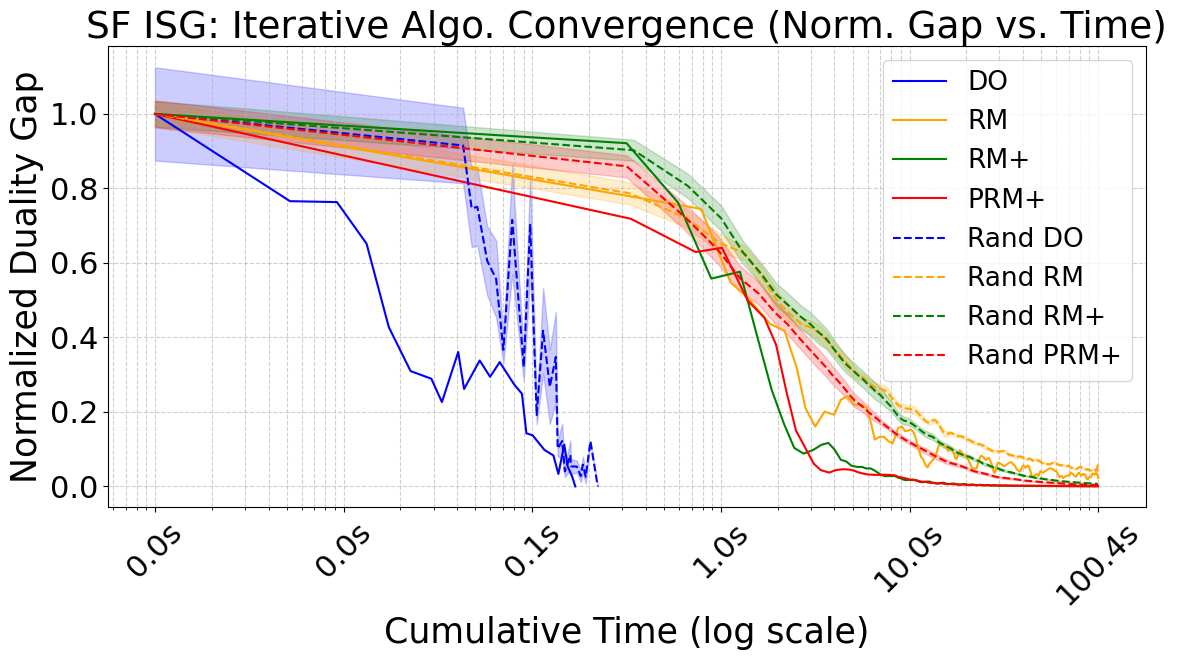

In [130]:
plot_iterative_algorithm_convergence(isfdo, isfrm, isfrmp, isfprmp, irsfdo, irsfrm, irsfrmp, irsfprmp, num_xticks=6, fake_zero = 1e-3, 
                                     title = "SF ISG: Iterative Algo. Convergence (Norm. Gap vs. Time)",
                                     save_path = "sf_isg_iterative.pdf")

## four panel

C:\Users\Noah\AppData\Local\Temp\ipykernel_34328\1408833177.py:327: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0)


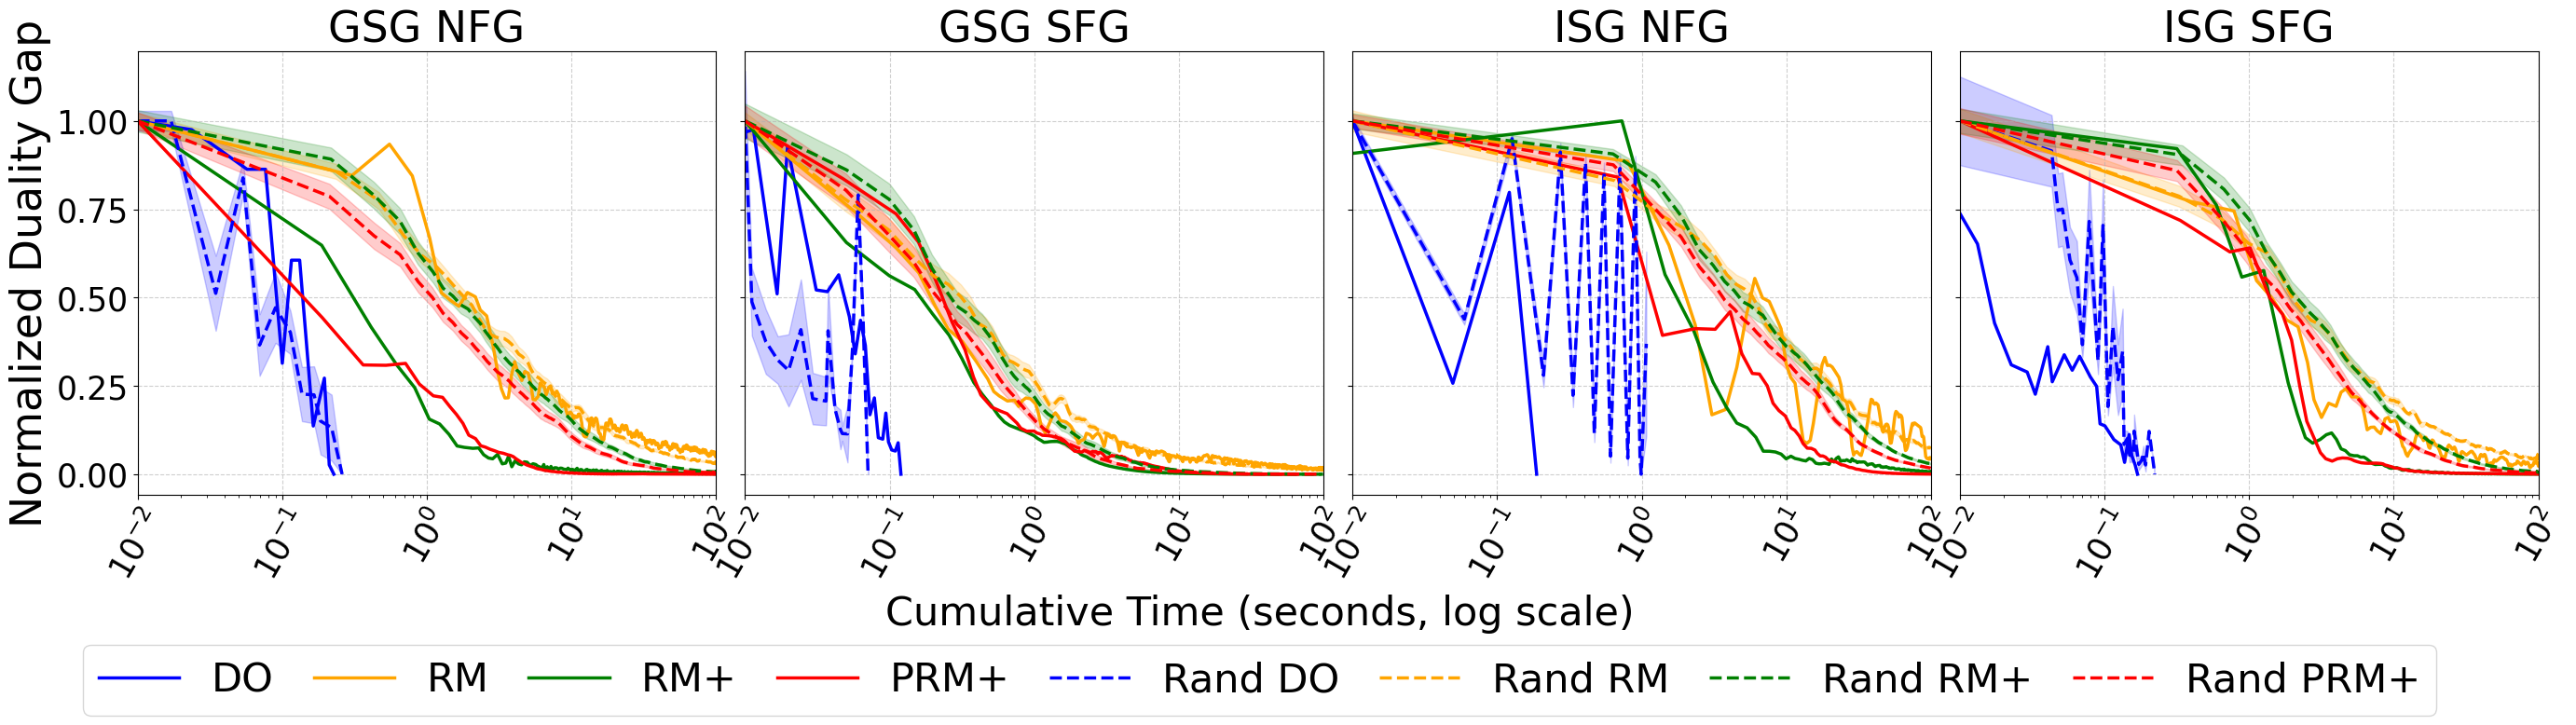

In [202]:
plot_four_panel_convergence(
    sets1=[gnfgdo, gnfgrm, gnfgrmp, gnfgprmp, grnfgdo, grnfgrm, grnfgrmp, grnfgprmp], 
    sets2=[gsfdo, gsfrm, gsfrmp, gsfprmp, grsfdo, grsfrm, grsfrmp, grsfprmp], 
    sets3=[infgdo, infgrm, infgrmp, infgprmp, irnfgdo, irnfgrm, irnfgrmp, irnfgprmp], 
    sets4=[isfdo, isfrm, isfrmp, isfprmp, irsfdo, irsfrm, irsfrmp, irsfprmp],
    titles=["GSG NFG", "GSG SFG", "ISG NFG", "ISG SFG"],
    save_path="iterative_convergence.pdf",
    legend_ncol=8
)

# Sparsity Experiment Plots

In [208]:
import ast
from collections import defaultdict
import matplotlib.cm as cm

# plt.rcParams.update({
#         'legend.fontsize': 16     # Legend font size
#     })



# def plot_sparsity_experiment(
#     real_dfs, random_dfs,
#     setting_names=None,
#     utitle=None, rtitle=None,
#     save_paths=None,
#     legend_locs=None,
#     horizontal_legend=False
# ):
#     import matplotlib.pyplot as plt
#     from matplotlib import cm
#     import numpy as np
#     from collections import defaultdict
#     import ast

#     num_settings = len(real_dfs)
#     colors = cm.get_cmap('Set1', num_settings)

#     fig1, ax1 = plt.subplots(figsize=(7, 6))  # Utility vs Support
#     fig2, ax2 = plt.subplots(figsize=(7, 6))  # Runtime vs Support

#     for idx, (real_df, random_df) in enumerate(zip(real_dfs, random_dfs)):
#         color = colors(idx) if callable(colors) else colors[idx % len(colors)]
#         name = setting_names[idx] if setting_names else f"Setting {idx+1}"

#         max_support_setting = max(
#             real_df['mip_support'].max(),
#             max(max(ast.literal_eval(row['mip_support'])) for _, row in random_df.iterrows())
#         )

#         # --- Utility Plot (Real) ---
#         x_real_util = real_df['mip_support'] / max_support_setting
#         min_util = real_df['mip_value'].iloc[0]
#         max_util = real_df['nash_value'].iloc[0]
#         y_real_util = (real_df['mip_value'] - min_util) / (max_util - min_util)
#         ax1.plot(x_real_util, y_real_util, label=f"{name} Real",
#                  color=color, linestyle='-', linewidth=3,
#                  marker='o', markevery=[-1], markersize=7, alpha=0.9)

#         # --- Utility Plot (Random) ---
#         support_to_utils = defaultdict(list)
#         for _, row in random_df.iterrows():
#             utils = ast.literal_eval(row['mip_value'])
#             supports = ast.literal_eval(row['mip_support'])
#             min_u = utils[0]
#             max_u = row['nash_value']
#             if max_u - min_u == 0:
#                 continue
#             norm_utils = [(u - min_u) / (max_u - min_u) for u in utils]
#             for s, v in zip(supports, norm_utils):
#                 support_to_utils[s].append(v)

#         sorted_supports = sorted(support_to_utils)
#         x_rand_util = np.array(sorted_supports) / max_support_setting
#         mean_util = [np.mean(support_to_utils[s]) for s in sorted_supports]
#         stderr_util = [np.std(support_to_utils[s]) / np.sqrt(len(support_to_utils[s])) for s in sorted_supports]
#         ax1.plot(x_rand_util, mean_util, color=color, linestyle='--', linewidth=2.3,
#                  marker='o', markevery=[-1], markersize=7, label=f"{name} Rand", alpha=0.85)
#         ax1.fill_between(x_rand_util,
#                          np.array(mean_util) - stderr_util,
#                          np.array(mean_util) + stderr_util,
#                          color=color, alpha=0.2)

#         # --- Runtime Plot (Real) ---
#         x_real_rt = real_df['mip_support']
#         x_real_rt_norm = (x_real_rt - x_real_rt.min()) / (x_real_rt.max() - x_real_rt.min())
#         runtimes = real_df['mip_runtime']
#         y_real_rt = (runtimes - runtimes.min()) / (runtimes.max() - runtimes.min())
#         ax2.plot(x_real_rt_norm, y_real_rt, label=f"{name} Real",
#                  color=color, linestyle='-', linewidth=3,
#                  marker='o', markevery=[-1], markersize=7, alpha=0.9)

#         # --- Runtime Plot (Random) ---
#         support_to_rt = defaultdict(list)
#         for _, row in random_df.iterrows():
#             rts = ast.literal_eval(row['mip_runtime'])
#             supports = ast.literal_eval(row['mip_support'])
#             for s, r in zip(supports, rts):
#                 support_to_rt[s].append(r)

#         sorted_supp_rt = sorted(support_to_rt)
#         x_rand_rt = np.array(sorted_supp_rt)
#         x_rand_rt_norm = (x_rand_rt - x_rand_rt.min()) / (x_rand_rt.max() - x_rand_rt.min())
#         mean_rt = [np.mean(support_to_rt[s]) for s in sorted_supp_rt]
#         stderr_rt = [np.std(support_to_rt[s]) / np.sqrt(len(support_to_rt[s])) for s in sorted_supp_rt]

#         rt_min = min(mean_rt)
#         rt_max = max(mean_rt)
#         norm_mean_rt = [(v - rt_min) / (rt_max - rt_min) for v in mean_rt]
#         norm_stderr_rt = [e / (rt_max - rt_min) for e in stderr_rt]

#         ax2.plot(x_rand_rt_norm, norm_mean_rt, color=color, linestyle='--', linewidth=2.3,
#                  marker='o', markevery=[-1], markersize=7, label=f"{name} Rand")
#         ax2.fill_between(x_rand_rt_norm,
#                          np.array(norm_mean_rt) - norm_stderr_rt,
#                          np.array(norm_mean_rt) + norm_stderr_rt,
#                          color=color, alpha=0.2)

#     # Format Utility plot
#     ax1.set_title(utitle or "Normalized Utility vs Normalized Support")
#     ax1.set_xlabel("Normalized k")
#     ax1.set_ylabel("Normalized Utility")
#     if horizontal_legend:
#         ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.03),
#                    ncol=2 * num_settings, frameon=False)
#     else:
#         ax1.legend(loc=legend_locs[0] if legend_locs else 'best')
#     ax1.grid(True)
#     fig1.tight_layout()

#     # Format Runtime plot
#     ax2.set_title(rtitle or "Runtime vs Normalized Support")
#     ax2.set_xlabel("Normalized k")
#     ax2.set_ylabel("Normalized Runtime")
#     if horizontal_legend:
#         ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.03),
#                    ncol=2 * num_settings, frameon=False)
#     else:
#         ax2.legend(loc=legend_locs[1] if legend_locs else 'best')
#     ax2.grid(True)
#     fig2.tight_layout()

#     # === Save plots if path(s) provided ===
#     if save_paths:
#         if isinstance(save_paths, (list, tuple)) and len(save_paths) == 2:
#             fig1.savefig(save_paths[0], format='pdf')
#             fig2.savefig(save_paths[1], format='pdf')
#         else:
#             raise ValueError("`save_paths` must be a list or tuple of two paths: [utility_path, runtime_path]")
#     else:
#         plt.show()

plt.rcParams.update({
    'font.size': 25,          # Base font size
    'axes.titlesize': 33,     # Title size
    'axes.labelsize': 33,     # Axis label size
    'xtick.labelsize': 31,    # X tick size
    'ytick.labelsize': 31,    # Y tick size
    'legend.fontsize': 33     # Legend font size
})
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'stix:italic'
# def plot_sparsity_experiment(
#     real_dfs, random_dfs,
#     setting_names=None,
#     title=None,
#     save_path=None,
#     legend_ncol=4
# ):
#     num_settings = len(real_dfs)
#     colors = cm.get_cmap('Set1', num_settings)

#     # Create combined figure with square-like aspect ratio
#     fig, (ax1, ax2) = plt.subplots(
#         1, 2, figsize=(14, 7), sharey=True, gridspec_kw={'width_ratios': [1, 1]}
#     )
    
#     for idx, (real_df, random_df) in enumerate(zip(real_dfs, random_dfs)):
#         color = colors(idx) if callable(colors) else colors[idx % len(colors)]
#         name = setting_names[idx] if setting_names else f"Setting {idx+1}"

#         max_support_setting = max(
#             real_df['mip_support'].max(),
#             max(max(ast.literal_eval(row['mip_support'])) for _, row in random_df.iterrows())
#         )

#         # --- Utility Plot (Real) ---
#         x_real_util = real_df['mip_support'] / max_support_setting
#         min_util = real_df['mip_value'].iloc[0]
#         max_util = real_df['nash_value'].iloc[0]
#         y_real_util = (real_df['mip_value'] - min_util) / (max_util - min_util)
#         ax1.plot(x_real_util, y_real_util, label=f"{name} Real",
#                  color=color, linestyle='-', linewidth=3,
#                  marker='o', markevery=[-1], markersize=7, alpha=0.9)

#         # --- Utility Plot (Random) ---
#         support_to_utils = defaultdict(list)
#         for _, row in random_df.iterrows():
#             utils = ast.literal_eval(row['mip_value'])
#             supports = ast.literal_eval(row['mip_support'])
#             min_u = utils[0]
#             max_u = row['nash_value']
#             if max_u - min_u == 0:
#                 continue
#             norm_utils = [(u - min_u) / (max_u - min_u) for u in utils]
#             for s, v in zip(supports, norm_utils):
#                 support_to_utils[s].append(v)

#         sorted_supports = sorted(support_to_utils)
#         x_rand_util = np.array(sorted_supports) / max_support_setting
#         mean_util = [np.mean(support_to_utils[s]) for s in sorted_supports]
#         stderr_util = [np.std(support_to_utils[s]) / np.sqrt(len(support_to_utils[s])) for s in sorted_supports]
#         ax1.plot(x_rand_util, mean_util, color=color, linestyle='--', linewidth=2.3,
#                  marker='o', markevery=[-1], markersize=7, label=f"{name} Rand", alpha=0.85)
#         ax1.fill_between(x_rand_util,
#                          np.array(mean_util) - stderr_util,
#                          np.array(mean_util) + stderr_util,
#                          color=color, alpha=0.2)

#         # --- Runtime Plot (Real) ---
#         x_real_rt = real_df['mip_support']
#         x_real_rt_norm = (x_real_rt - x_real_rt.min()) / (x_real_rt.max() - x_real_rt.min())
#         runtimes = real_df['mip_runtime']
#         y_real_rt = (runtimes - runtimes.min()) / (runtimes.max() - runtimes.min())
#         ax2.plot(x_real_rt_norm, y_real_rt, label=f"{name} Real",
#                  color=color, linestyle='-', linewidth=3,
#                  marker='o', markevery=[-1], markersize=7, alpha=0.9)

#         # --- Runtime Plot (Random) ---
#         support_to_rt = defaultdict(list)
#         for _, row in random_df.iterrows():
#             rts = ast.literal_eval(row['mip_runtime'])
#             supports = ast.literal_eval(row['mip_support'])
#             for s, r in zip(supports, rts):
#                 support_to_rt[s].append(r)

#         sorted_supp_rt = sorted(support_to_rt)
#         x_rand_rt = np.array(sorted_supp_rt)
#         x_rand_rt_norm = (x_rand_rt - x_rand_rt.min()) / (x_rand_rt.max() - x_rand_rt.min())
#         mean_rt = [np.mean(support_to_rt[s]) for s in sorted_supp_rt]
#         stderr_rt = [np.std(support_to_rt[s]) / np.sqrt(len(support_to_rt[s])) for s in sorted_supp_rt]

#         rt_min = min(mean_rt)
#         rt_max = max(mean_rt)
#         norm_mean_rt = [(v - rt_min) / (rt_max - rt_min) for v in mean_rt]
#         norm_stderr_rt = [e / (rt_max - rt_min) for e in stderr_rt]

#         ax2.plot(x_rand_rt_norm, norm_mean_rt, color=color, linestyle='--', linewidth=2.3,
#                  marker='o', markevery=[-1], markersize=7, label=f"{name} Rand")
#         ax2.fill_between(x_rand_rt_norm,
#                          np.array(norm_mean_rt) - norm_stderr_rt,
#                          np.array(norm_mean_rt) + norm_stderr_rt,
#                          color=color, alpha=0.2)

#     # Format Utility plot
#     ax1.set_title("Utility vs. Support")
#     ax1.set_ylabel("Normalized Value")
#     ax1.grid(True)

#     # Format Runtime plot
#     ax2.set_title("Runtime vs. Support")
#     ax2.grid(True)

#     # Unified Legend
#     handles, labels = ax1.get_legend_handles_labels()
#     # fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.12), ncol=legend_ncol, frameon=True)
#     fig.legend(
#     handles, labels,
#     loc='lower center',
#     bbox_to_anchor=(0.5, -0.12),
#     ncol=legend_ncol,
#     frameon=True,
#     handletextpad=0.2,  # Reduce space between handles and text
#     columnspacing=0.25   # Reduce space between columns
#     )

#     # Single X-Axis Label
#     fig.text(0.5, 0.01, "Normalized k", ha='center', fontsize=25)

#     # Remove Excess Padding
#     fig.tight_layout(pad=0)
#     fig.subplots_adjust(bottom=0.12, left=0.08, right=0.95, top=0.9)

#     # Save to PDF
#     if save_path:
#         fig.savefig(save_path, format='pdf', bbox_inches="tight")
#     else:
#         plt.show()

def plot_four_panel_sparsity(
    real_dfs_1, random_dfs_1, real_dfs_2, random_dfs_2,
    setting_names_1=None, setting_names_2=None,
    save_path=None, legend_ncol=6
):
    # Create combined figure with square-like aspect ratio
    fig, axs = plt.subplots(
        1, 4, figsize=(28, 7), sharey=True,
        gridspec_kw={'width_ratios': [1, 1, 1, 1], 'wspace': 0}
    )

    # Set consistent colors
    colors = {r"$\mathcal{T}=7$": "#e41a1c", r"$\mathcal{T}=8$": "#999999", r"$\mathcal{T}=9$": "#ff7f00"}  # Red, Grey, Orange
    all_settings = sorted(set(setting_names_1 + setting_names_2))  # Combine both sets of settings

    # Store legend handles and labels
    all_handles = []
    all_labels = []

    # Iterate over both sets of data
    for panel_idx, (real_dfs, random_dfs, setting_names, start_ax) in enumerate([
        (real_dfs_1, random_dfs_1, setting_names_1, 0),
        (real_dfs_2, random_dfs_2, setting_names_2, 2)
    ]):
        for idx, (real_df, random_df) in enumerate(zip(real_dfs, random_dfs)):
            setting_name = setting_names[idx]
            color = colors[setting_name]

            # --- Utility Plot (Real) ---
            max_support_setting = max(real_df['mip_support'].max(), 
                                      max(max(ast.literal_eval(row['mip_support'])) for _, row in random_df.iterrows()))
            x_real_util = real_df['mip_support'] / max_support_setting
            min_util = real_df['mip_value'].iloc[0]
            max_util = real_df['nash_value'].iloc[0]
            y_real_util = (real_df['mip_value'] - min_util) / (max_util - min_util)
            line_real, = axs[start_ax].plot(x_real_util, y_real_util, label=f"{setting_name} Real",
                                            color=color, linestyle='-', linewidth=3,
                                            marker='o', markevery=[-1], markersize=7, alpha=0.9)

            # Capture legend entry
            if f"{setting_name} Real" not in all_labels:
                all_handles.append(line_real)
                all_labels.append(f"{setting_name} Real")

            # --- Utility Plot (Random) ---
            support_to_utils = defaultdict(list)
            for _, row in random_df.iterrows():
                utils = ast.literal_eval(row['mip_value'])
                supports = ast.literal_eval(row['mip_support'])
                min_u = utils[0]
                max_u = row['nash_value']
                if max_u - min_u == 0:
                    continue
                norm_utils = [(u - min_u) / (max_u - min_u) for u in utils]
                for s, v in zip(supports, norm_utils):
                    support_to_utils[s].append(v)

            sorted_supports = sorted(support_to_utils)
            x_rand_util = np.array(sorted_supports) / max_support_setting
            mean_util = [np.mean(support_to_utils[s]) for s in sorted_supports]
            stderr_util = [np.std(support_to_utils[s]) / np.sqrt(len(support_to_utils[s])) for s in sorted_supports]
            line_rand, = axs[start_ax].plot(x_rand_util, mean_util, color=color, linestyle='--', linewidth=2.3,
                                            marker='o', markevery=[-1], markersize=7, label=f"{setting_name} Rand", alpha=0.85)
            axs[start_ax].fill_between(x_rand_util,
                                       np.array(mean_util) - stderr_util,
                                       np.array(mean_util) + stderr_util,
                                       color=color, alpha=0.2)

            # Capture legend entry
            if f"{setting_name} Rand" not in all_labels:
                all_handles.append(line_rand)
                all_labels.append(f"{setting_name} Rand")

            # --- Runtime Plot (Real) ---
            max_runtime = max(real_df['mip_runtime'])
            x_real_rt = real_df['mip_support']
            x_real_rt_norm = (x_real_rt - x_real_rt.min()) / (x_real_rt.max() - x_real_rt.min())
            runtimes = (real_df['mip_runtime'] - real_df['mip_runtime'].min()) / (max_runtime - real_df['mip_runtime'].min())
            axs[start_ax+1].plot(x_real_rt_norm, runtimes, color=color, linestyle='-', linewidth=3,
                                 marker='o', markevery=[-1], markersize=7, alpha=0.9)

            # --- Runtime Plot (Random) ---
            support_to_rt = defaultdict(list)
            for _, row in random_df.iterrows():
                rts = ast.literal_eval(row['mip_runtime'])
                supports = ast.literal_eval(row['mip_support'])
                for s, r in zip(supports, rts):
                    support_to_rt[s].append(r)

            sorted_supports = sorted(support_to_rt)
            max_error_bar = max([
                np.mean(support_to_rt[s]) + np.std(support_to_rt[s]) / np.sqrt(len(support_to_rt[s]))
                for s in support_to_rt
            ])

            x_rand_rt = np.array(sorted_supports)
            x_rand_rt_norm = (x_rand_rt - x_rand_rt.min()) / (x_rand_rt.max() - x_rand_rt.min())
            mean_rt = [(np.mean(support_to_rt[s]) - min(rts)) / (max_error_bar - min(rts)) for s in sorted_supports]
            stderr_rt = [np.std(support_to_rt[s]) / np.sqrt(len(support_to_rt[s])) / max_error_bar for s in sorted_supports]

            axs[start_ax+1].plot(x_rand_rt_norm, mean_rt, color=color, linestyle='--', linewidth=2.3,
                                 marker='o', markevery=[-1], markersize=7, alpha=0.9)
            axs[start_ax+1].fill_between(x_rand_rt_norm,
                                         np.array(mean_rt) - stderr_rt,
                                         np.array(mean_rt) + stderr_rt,
                                         color=color, alpha=0.2)

            # Add gridlines back
            axs[start_ax].grid(True, linestyle='--', alpha=0.6)
            axs[start_ax+1].grid(True, linestyle='--', alpha=0.6)

    # Set titles and labels
    axs[0].set_title("NFG Utility vs. Support")
    axs[1].set_title("NFG Runtime vs. Support")
    axs[2].set_title("SFG Utility vs. Support")
    axs[3].set_title("SFG Runtime vs. Support")
    axs[0].set_ylabel("Normalized Value")

    # Set consistent x-ticks for all subplots
    for ax in axs:
        ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
        ax.set_xticklabels(["0", "0.25", "0.5", "0.75", "1"])

    # Single X-Axis Label
    fig.text(0.5, 0.04, "Normalized k", ha='center', fontsize=33)

    # Unified Legend
    fig.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, -0.14), ncol=legend_ncol, frameon=True, handletextpad=0.5, columnspacing=1)

    # Remove excess padding
    fig.tight_layout(pad=0)
    fig.subplots_adjust(bottom=0.2, left=0.07, right=0.99, top=0.88)

    # Save to PDF
    if save_path:
        fig.savefig(save_path, format='pdf', bbox_inches="tight")
    else:
        plt.show()



In [259]:
t8 = pd.read_csv("GSG_NFG_T8_1A_SPARSITY.csv")
t9 = pd.read_csv("GSG_NFG_T9_1A_SPARSITY.csv")
t8r = pd.read_csv("GSG_NFG_T8_1D1A_SPARSITY_RANDOM_MATRIX.csv")
t9r = pd.read_csv("GSG_NFG_T9_1D1A_SPARSITY_RANDOM_MATRIX.csv")

C:\Users\Noah\AppData\Local\Temp\ipykernel_30748\1563322160.py:159: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Set1', num_settings)


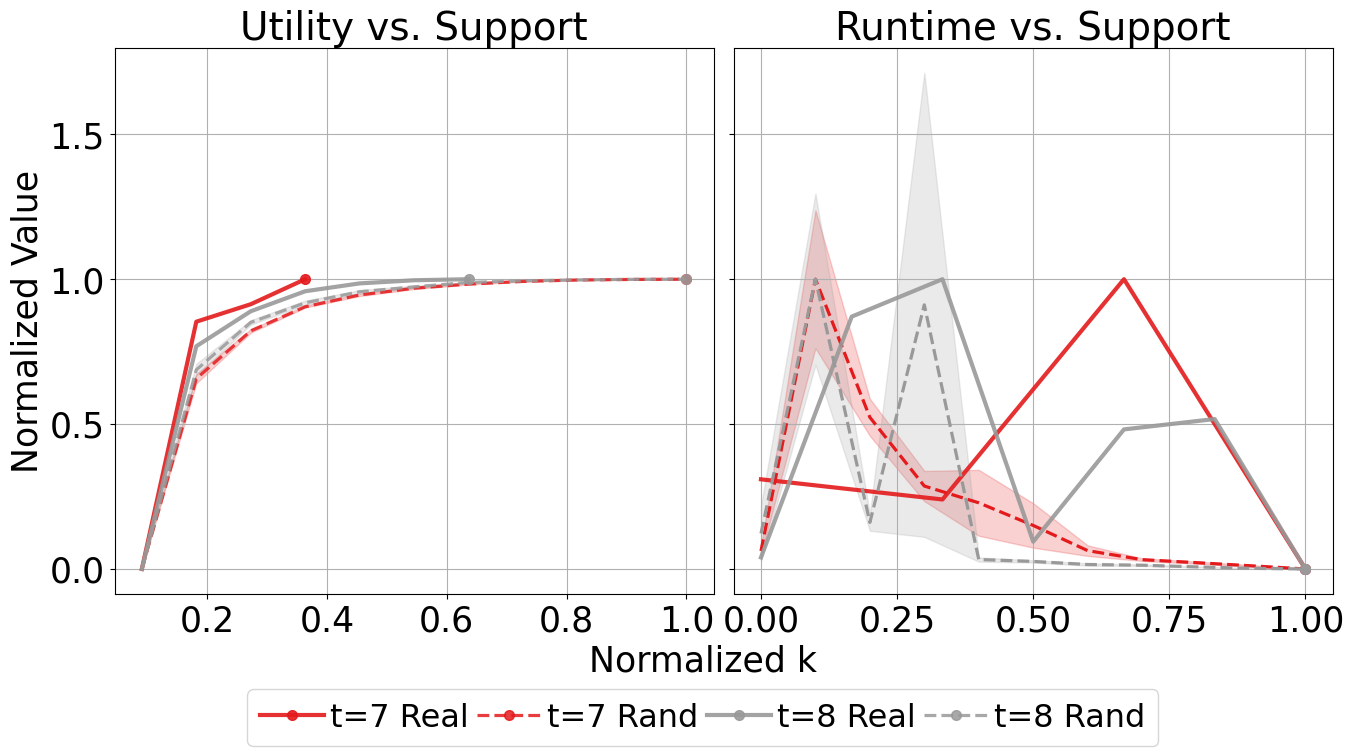

In [257]:
plot_sparsity_experiment([t8,t9], [t8r,t9r], setting_names=["t=7", "t=8"], 
                         # utitle="NFG GSG U vs. k",
                         # rtitle ="NFG GSG RT vs. k",
                         title = "Sparsity Results",
                         save_path="nfg_gsg_combined_sparsity.pdf",
                        legend_ncol=6)

# plot_sparsity_experiment(
#     real_dfs=[df1_real, df2_real],
#     random_dfs=[df1_random, df2_random],
#     setting_names=["Setting 1", "Setting 2"],
#     title="Sparsity Experiment Results",
#     save_path="sparsity_experiment_combined.pdf"
# )

In [204]:
t8 = pd.read_csv("GSG_NFG_T8_1A_SPARSITY.csv")
t9 = pd.read_csv("GSG_NFG_T9_1A_SPARSITY.csv")
t8r = pd.read_csv("GSG_NFG_T8_1D1A_SPARSITY_RANDOM_MATRIX.csv")
t9r = pd.read_csv("GSG_NFG_T9_1D1A_SPARSITY_RANDOM_MATRIX.csv")
st8 = pd.read_csv("GSG_SF_T8_SPARSITY_FINAL.csv")
st9 = pd.read_csv("GSG_SF_T9_SPARSITY_FINAL.csv")
st10 = pd.read_csv("GSG_SF_T10_SPARSITY_FINAL.csv")
st8r = pd.read_csv("GSG_SF_T8_SPARSITY_RANDOM_MATRIX.csv")
st9r = pd.read_csv("GSG_SF_T9_SPARSITY_RANDOM_MATRIX.csv")
st10r = pd.read_csv("GSG_SF_T10_SPARSITY_RANDOM_MATRIX.csv")

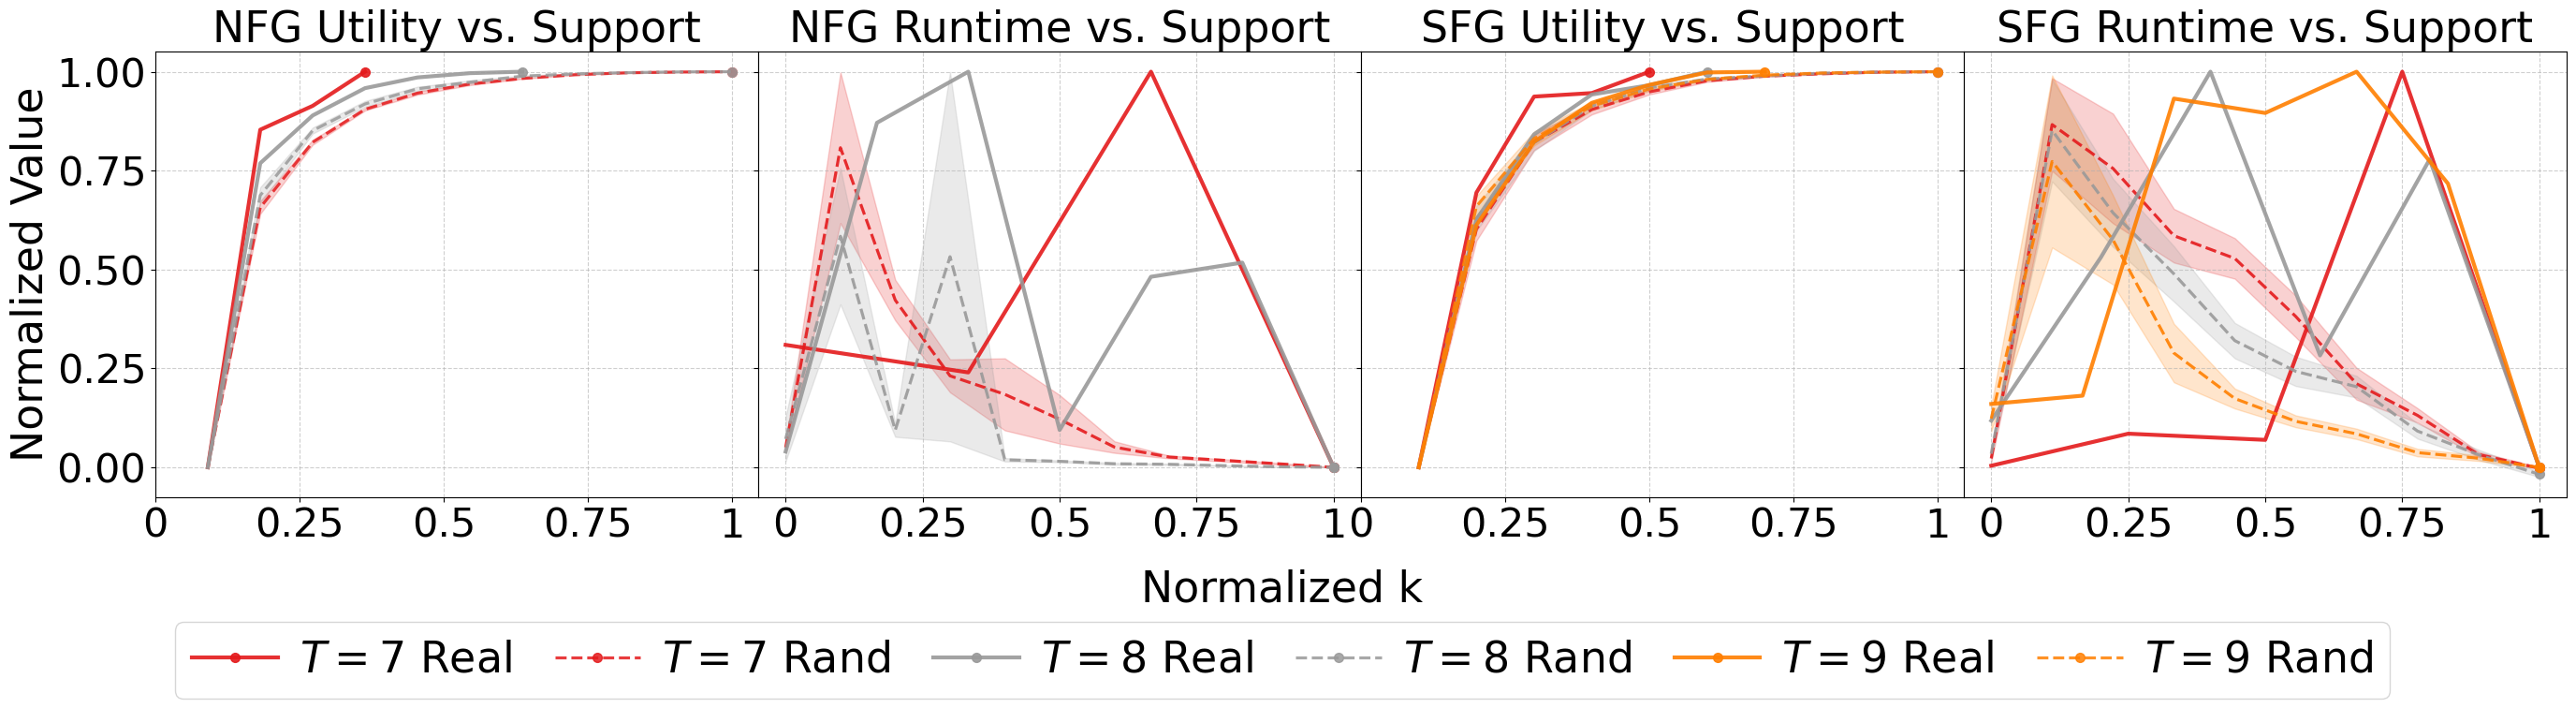

In [209]:
# plot_sparsity_experiment([st8,st9,st10], [st8r,st9r,st10r], 
#                          setting_names=["t=7", "t=8", "t=9"], 
#                          utitle="SF GSG U vs. k",
#                          rtitle ="SF GSG RT vs. k",
#                          save_paths=["sf_gsg_utility_plot.pdf", "sf_gsg_runtime_plot.pdf"],
#                          legend_locs = [None, "upper right"], horizontal_legend=False)

# plot_sparsity_experiment([st8,st9,st10], [st8r,st9r,st10r], setting_names=["t=7", "t=8", "t=9"], 
#                          # utitle="NFG GSG U vs. k",
#                          # rtitle ="NFG GSG RT vs. k",
#                          title = "Sparsity Results",
#                          save_path="sfg_gsg_combined_sparsity.pdf",
#                          legend_ncol=6)


plot_four_panel_sparsity(
    real_dfs_1=[t8, t9],
    random_dfs_1=[t8r, t9r],
    real_dfs_2=[st8, st9, st10],
    random_dfs_2=[st8r, st9r, st10r],
    setting_names_1=[r"$\mathcal{T}=7$", r"$\mathcal{T}=8$",],
    setting_names_2=[r"$\mathcal{T}=7$", r"$\mathcal{T}=8$", r"$\mathcal{T}=9$"],
    save_path="four_panel_sparsity.pdf",
    legend_ncol=6
)

In [241]:
st10r

,Unnamed: 0,seed,num_timesteps,num_attackers,num_defenders,num_clusters,dims,defense_time_threshold,force_return,num_defender_actions,nash_value,nash_support,nash_runtime,mip_value,mip_support,mip_runtime
0,0,1,10,1,2,10,7,2,False,2401,-0.253605,8,0.236281,"[-0.40068249102802195, -0.3176999753081526, -0...","[1, 2, 3, 4, 5, 6, 7, 8]","[0.7710902690887451, 4.629194021224976, 2.6587..."
1,1,2,10,1,2,10,7,2,False,2401,-0.263136,9,0.173865,"[-0.44987933261671675, -0.34632841673516046, -...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.5698845386505127, 10.735763549804688, 5.367..."
2,2,3,10,1,2,10,7,2,False,2401,-0.270763,10,0.171223,"[-0.4811407822614249, -0.3309055233967805, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6406888961791992, 3.4138107299804688, 2.337..."
3,3,4,10,1,2,10,7,2,False,2401,-0.280383,10,0.172195,"[-0.46118024995065876, -0.3426789214769698, -0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6343221664428711, 1.2823545932769775, 5.480..."
4,4,5,10,1,2,10,7,2,False,2401,-0.248891,10,0.172318,"[-0.4965335556086801, -0.2926772833478436, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.7090640068054199, 0.9008779525756836, 0.853..."
5,5,6,10,1,2,10,7,2,False,2401,-0.252663,9,0.179286,"[-0.468225517657905, -0.31069253834598015, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[1.2646329402923584, 2.888512372970581, 3.8674..."
6,6,7,10,1,2,10,7,2,False,2401,-0.275818,10,0.177366,"[-0.5542275947385978, -0.3617897167056349, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[1.1114680767059326, 15.565851211547852, 8.417..."
7,7,8,10,1,2,10,7,2,False,2401,-0.279012,10,0.184612,"[-0.4691986366535408, -0.3380366030038281, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.7301604747772217, 4.078875541687012, 5.4972..."
8,8,9,10,1,2,10,7,2,False,2401,-0.247238,9,0.244623,"[-0.37689756841129995, -0.30072469786632616, -...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[2.8923544883728027, 1.7235264778137207, 0.822..."
9,9,10,10,1,2,10,7,2,False,2401,-0.265956,10,0.210652,"[-0.44210547472802414, -0.3388184199335233, -0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.8763759136199951, 4.857979774475098, 2.6047..."


In [118]:
st9r

,Unnamed: 0,seed,num_timesteps,num_attackers,num_defenders,num_clusters,dims,defense_time_threshold,force_return,num_defender_actions,nash_value,nash_support,nash_runtime,mip_value,mip_support,mip_runtime
0,0,1,9,1,2,10,7,2,False,1024,-0.290330,10,0.115435,"[-0.4339125713795936, -0.3824697367114411, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.27931761741638184, 1.4861969947814941, 1.53..."
1,1,2,9,1,2,10,7,2,False,1024,-0.307016,9,0.075056,"[-0.5315529305720299, -0.38498854887125855, -0...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.20938706398010254, 2.184225559234619, 1.175..."
2,2,3,9,1,2,10,7,2,False,1024,-0.276217,9,0.079893,"[-0.5370053672437123, -0.35254141180045034, -0...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.17422199249267578, 1.0200650691986084, 0.86..."
3,3,4,9,1,2,10,7,2,False,1024,-0.295542,10,0.093533,"[-0.4932172349141911, -0.3622695035452386, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.24433636665344238, 1.570646047592163, 1.252..."
4,4,5,9,1,2,10,7,2,False,1024,-0.287893,10,0.097467,"[-0.43794098936155895, -0.3500173093491917, -0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.15801358222961426, 0.9724347591400146, 0.50..."
5,5,6,9,1,2,10,7,2,False,1024,-0.252651,10,0.075001,"[-0.39033260957808347, -0.3112114630881551, -0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.22573137283325195, 0.4162018299102783, 0.46..."
6,6,7,9,1,2,10,7,2,False,1024,-0.254074,9,0.073184,"[-0.36992923920854837, -0.2914045790617661, -0...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.17469120025634766, 0.477766752243042, 0.479..."
7,7,8,9,1,2,10,7,2,False,1024,-0.264677,10,0.089659,"[-0.5254645741668205, -0.3376748234644291, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.21364831924438477, 0.8747038841247559, 0.70..."
8,8,9,9,1,2,10,7,2,False,1024,-0.287499,10,0.076580,"[-0.5346169071956984, -0.36969260986457014, -0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.15915250778198242, 1.2205300331115723, 0.86..."
9,9,10,9,1,2,10,7,2,False,1024,-0.302249,10,0.082121,"[-0.4502520477033025, -0.3489705858611597, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.19426536560058594, 0.7273716926574707, 0.82..."


In [119]:
st8r

,Unnamed: 0,seed,num_timesteps,num_attackers,num_defenders,num_clusters,dims,defense_time_threshold,force_return,num_defender_actions,nash_value,nash_support,nash_runtime,mip_value,mip_support,mip_runtime
0,0,1,8,1,2,10,7,2,False,841,-0.270333,10,0.116418,"[-0.44202759304947037, -0.34021982744850454, -...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.18997406959533691, 0.6132221221923828, 0.57..."
1,1,2,8,1,2,10,7,2,False,841,-0.314891,10,0.099588,"[-0.5169998068278243, -0.39430120863183316, -0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.2599315643310547, 0.8976151943206787, 1.332..."
2,2,3,8,1,2,10,7,2,False,841,-0.303566,10,0.123173,"[-0.4464739835815207, -0.3471346633305854, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.16356182098388672, 0.5941586494445801, 0.84..."
3,3,4,8,1,2,10,7,2,False,841,-0.284016,10,0.063158,"[-0.5747261132848356, -0.3736832252019017, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.13441777229309082, 0.9191174507141113, 0.62..."
4,4,5,8,1,2,10,7,2,False,841,-0.270057,10,0.057203,"[-0.38559304727953037, -0.3417860084434791, -0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.1521754264831543, 0.5202031135559082, 0.511..."
5,5,6,8,1,2,10,7,2,False,841,-0.279642,9,0.062325,"[-0.4363576658462688, -0.3566556076602689, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.13516855239868164, 0.6560118198394775, 0.57..."
6,6,7,8,1,2,10,7,2,False,841,-0.293355,10,0.065141,"[-0.47811021376501606, -0.36617258882246706, -...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.16474533081054688, 1.6268126964569092, 0.69..."
7,7,8,8,1,2,10,7,2,False,841,-0.314277,10,0.070781,"[-0.5213085907924393, -0.39537023932095205, -0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.1380157470703125, 1.353914499282837, 0.9798..."
8,8,9,8,1,2,10,7,2,False,841,-0.305389,10,0.071523,"[-0.5798451934359521, -0.4016709115467397, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.1412370204925537, 1.7490155696868896, 2.203..."
9,9,10,8,1,2,10,7,2,False,841,-0.289844,10,0.062892,"[-0.5625535508522224, -0.3769132716018507, -0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.1536872386932373, 1.0952174663543701, 0.580..."
